# EDA & Preprocessing

## EDA

### Import package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
plt.rcParams['font.family'] = 'NanumGothic'

### Function

In [2]:
# 데이터 검증 : data1과 data2에 있는 가수 정보가 서로 포함되어 있는지 확인
def check_artist(data1, data2):
    artist = list(data1['Artist'])
    for idx in artist:
        if idx not in set(data2['Artist']):
            print(idx)

def artist_num(data1, data2):
    if len(data1['Artist'].value_counts()) == len(data2['Artist'].value_counts()):
        print("가수 정보가 일치합니다")
    else:
        print("누락된 가수 정보를 검색합니다")
        check_artist(data1, data2)
        check_artist(data2, data1)

In [3]:
# 데이터 그룹 분포 시각화
def data_distribution(data, feature, count_num):
    
    if feature == 'Genre':
        new_rows = []
        for _, row in data.iterrows():
            genres = row[feature].split()
            for genre in genres:
                new_rows.append({feature: genre})

        data = pd.DataFrame(new_rows)
        
    counts = data[feature].value_counts()
    # 데이터를 개씩 끊어서 여러 그래프로 표현
    num_subplots = len(counts) // count_num + 1

    plt.figure(figsize=(14, 6*num_subplots))
    for i in range(num_subplots):
        start_idx = i * count_num
        end_idx = (i + 1) * count_num
        
        plt.subplot(num_subplots, 1, i + 1)
        sns.barplot(x=counts.index[start_idx:end_idx], y=counts.values[start_idx:end_idx])
        plt.xticks(rotation=45, horizontalalignment='right')

        plt.title("Data distribution (Graph {})".format(i + 1))
        plt.xlabel("Data")
        plt.ylabel("Count")

        plt.tight_layout()
        
    plt.show()

In [4]:
# 음계 변환 함수
def convert_flat_to_sharp(note):
    flats = {"Ab": "G#", "Bb": "A#", "Db": "C#", "Eb": "D#", "Gb" : "F#"}
    
    for flat, sharp in flats.items():
        note = note.replace(flat, sharp)
    
    return note

# 주파수 변환 함수
def convert_to_frequency(row, table):
    # "Low"와 "High" 열의 값을 음계와 옥타브로 분할
    low_note = ''.join(filter(str.isalpha, row['Low']))
    low_octave = int(''.join(filter(str.isdigit, row['Low'])))
    
    high_note = ''.join(filter(str.isalpha, row['High']))
    high_octave = int(''.join(filter(str.isdigit, row['High'])))
    
    low_note = convert_flat_to_sharp(low_note)
    high_note = convert_flat_to_sharp(high_note)

    # octave_table에서 노트에 해당하는 주파수 값을 찾아서 반환
    low_frequency = table[low_note][low_octave]
    high_frequency = table[high_note][high_octave]

    return low_frequency, high_frequency

### Load dataset

In [5]:
# 노래 정보(제목, 가수, 좋아요, 장르)
datafile = './data/dataset.csv'
column_names = ['Title', 'Artist', 'Rating', 'Genre']

# 음역대 정보(가수, 최저 음역대, 최고 음역대)
octavefile = './data/octave.csv'

# 음역대 별 주파수 정보
tablefile = './data/octave_table.csv'

In [6]:
# 데이터 불러오기 
df_singer = pd.read_csv(datafile, names=column_names)
df_octave = pd.read_csv(octavefile)
octave_table = pd.read_csv(tablefile)

In [7]:
# 데이터 중복 제거
df_singer = df_singer.sort_values(by='Rating', ascending=False)  # Rating을 기준으로 내림차순 정렬
df_singer = df_singer.drop_duplicates(subset=['Title', 'Artist'], keep='first')  # 중복 행 중 첫 번째 행 유지

### Data Visualization

#### Singer

In [8]:
# 가수 인원 확인
artist_num(df_singer, df_octave)

가수 정보가 일치합니다


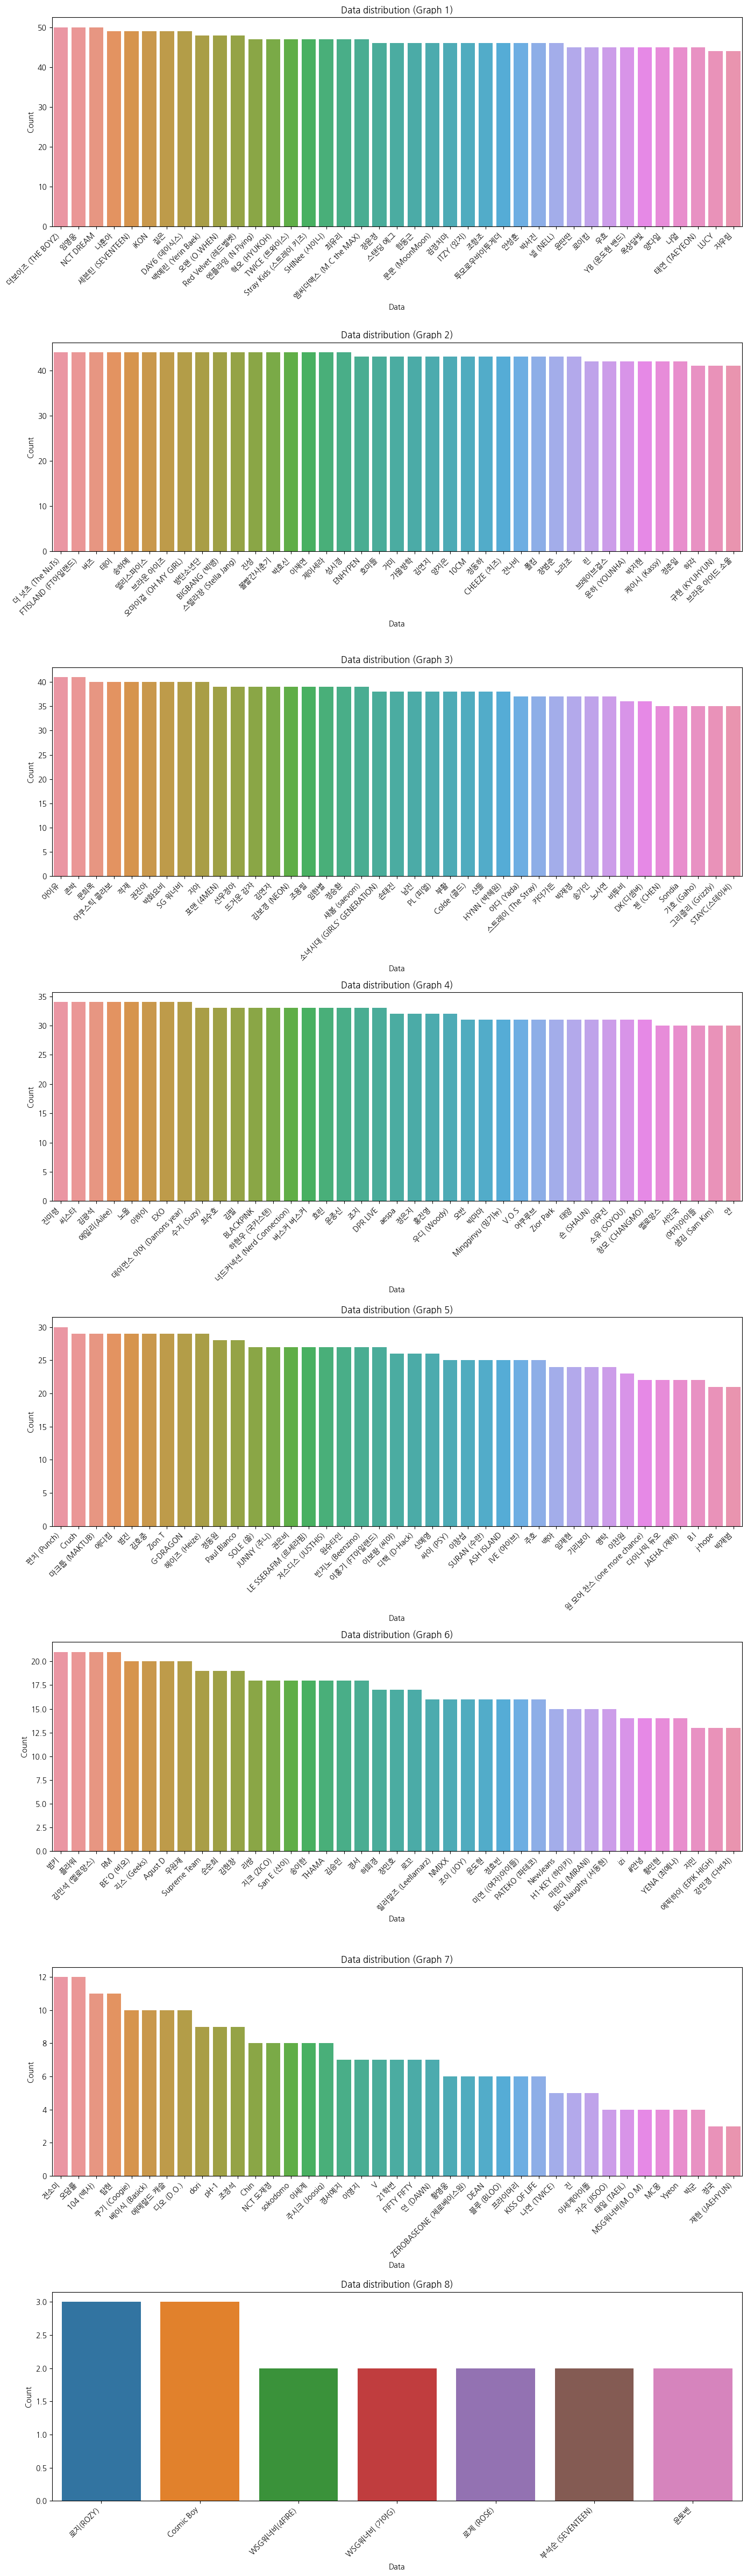

In [14]:
# 가수별 노래 개수 분포 
data_distribution(df_singer, 'Artist', 39)

In [12]:
# 인기 노래 정렬
df_singer.sort_values(by='Rating', ascending=False)[:10]

Title      Artist  Rating        Genre
5518                                     봄날       방탄소년단  550574         랩/힙합
1634                                    밤편지         아이유  462165          발라드
5516                               Dynamite       방탄소년단  458072           댄스
4918  모든 날  모든 순간 (Every day  Every Moment)          폴킴  427725    발라드 국내드라마
5560                           주저하는 연인들을 위해         잔나비  394868    인디음악 록/메탈
5519                                    DNA       방탄소년단  374982         랩/힙합
4886                          Way Back Home   숀 (SHAUN)  363413  인디음악 일렉트로니카
486                                      좋니         윤종신  360033          발라드
1635                               Blueming         아이유  356891         록/메탈
968                            첫눈처럼 너에게 가겠다  에일리(Ailee)  355527    발라드 국내드라마

#### Genres

In [11]:
# 선호도 고려를 위한 데이터프레임 생성
preference_list = ['Rating', 'Genre']
df_recommend = pd.DataFrame(df_singer[preference_list])
df_recommend

Rating      Genre
5518  550574       랩/힙합
1634  462165        발라드
5516  458072         댄스
4918  427725  발라드 국내드라마
5560  394868  인디음악 록/메탈
...      ...        ...
8785       0   성인가요/트로트
7443       0        POP
8803       0   성인가요/트로트
7444       0        POP
8811       0   성인가요/트로트

[8212 rows x 2 columns]

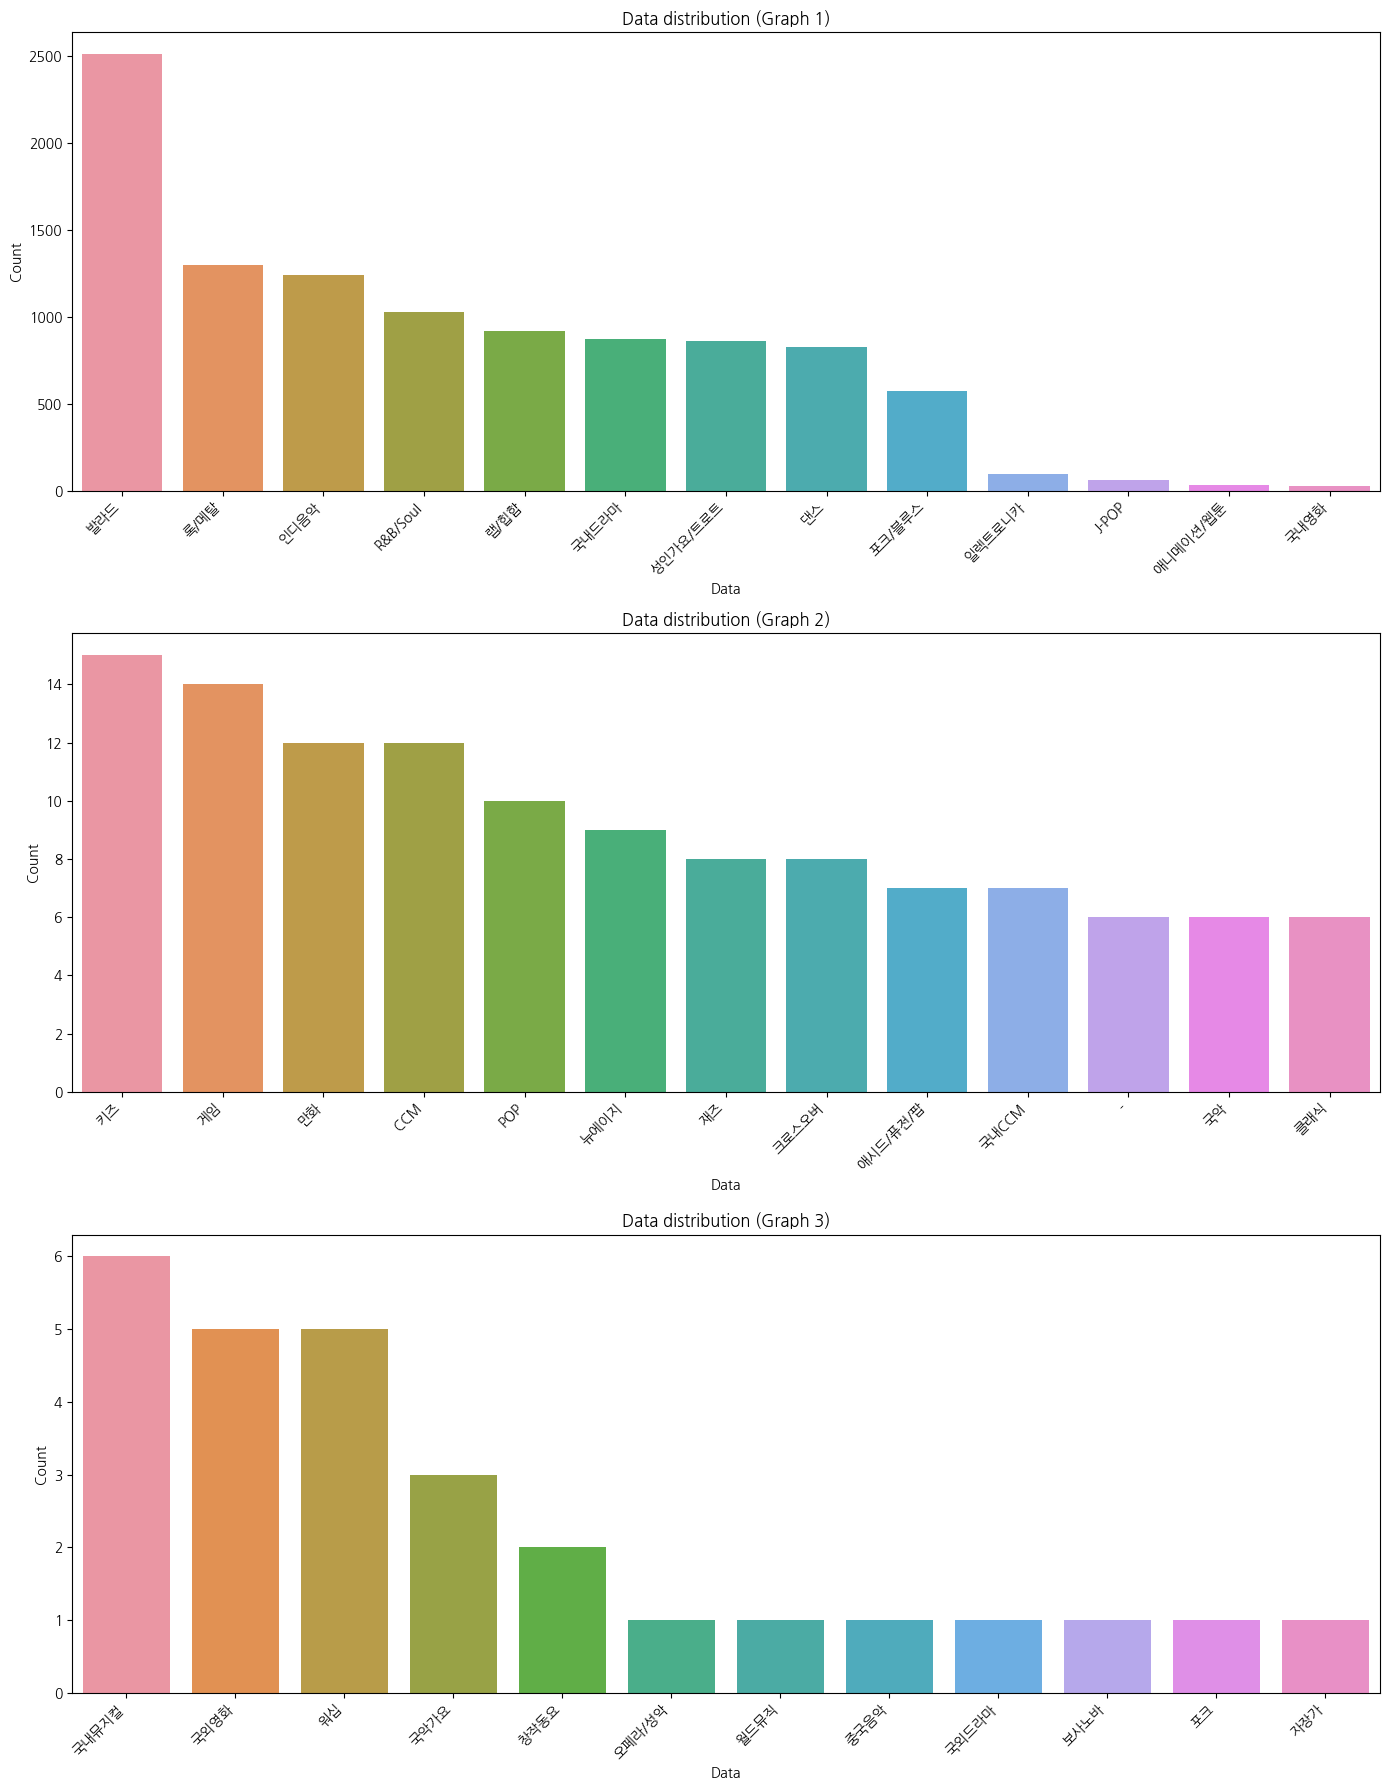

In [14]:
data_distribution(df_recommend, 'Genre', 13)

#### Octave

In [ ]:
# 주파수 추가
df_octave['Frequency'] = df_octave.apply(convert_to_frequency, axis=1, args=(octave_table, ))
df_octave

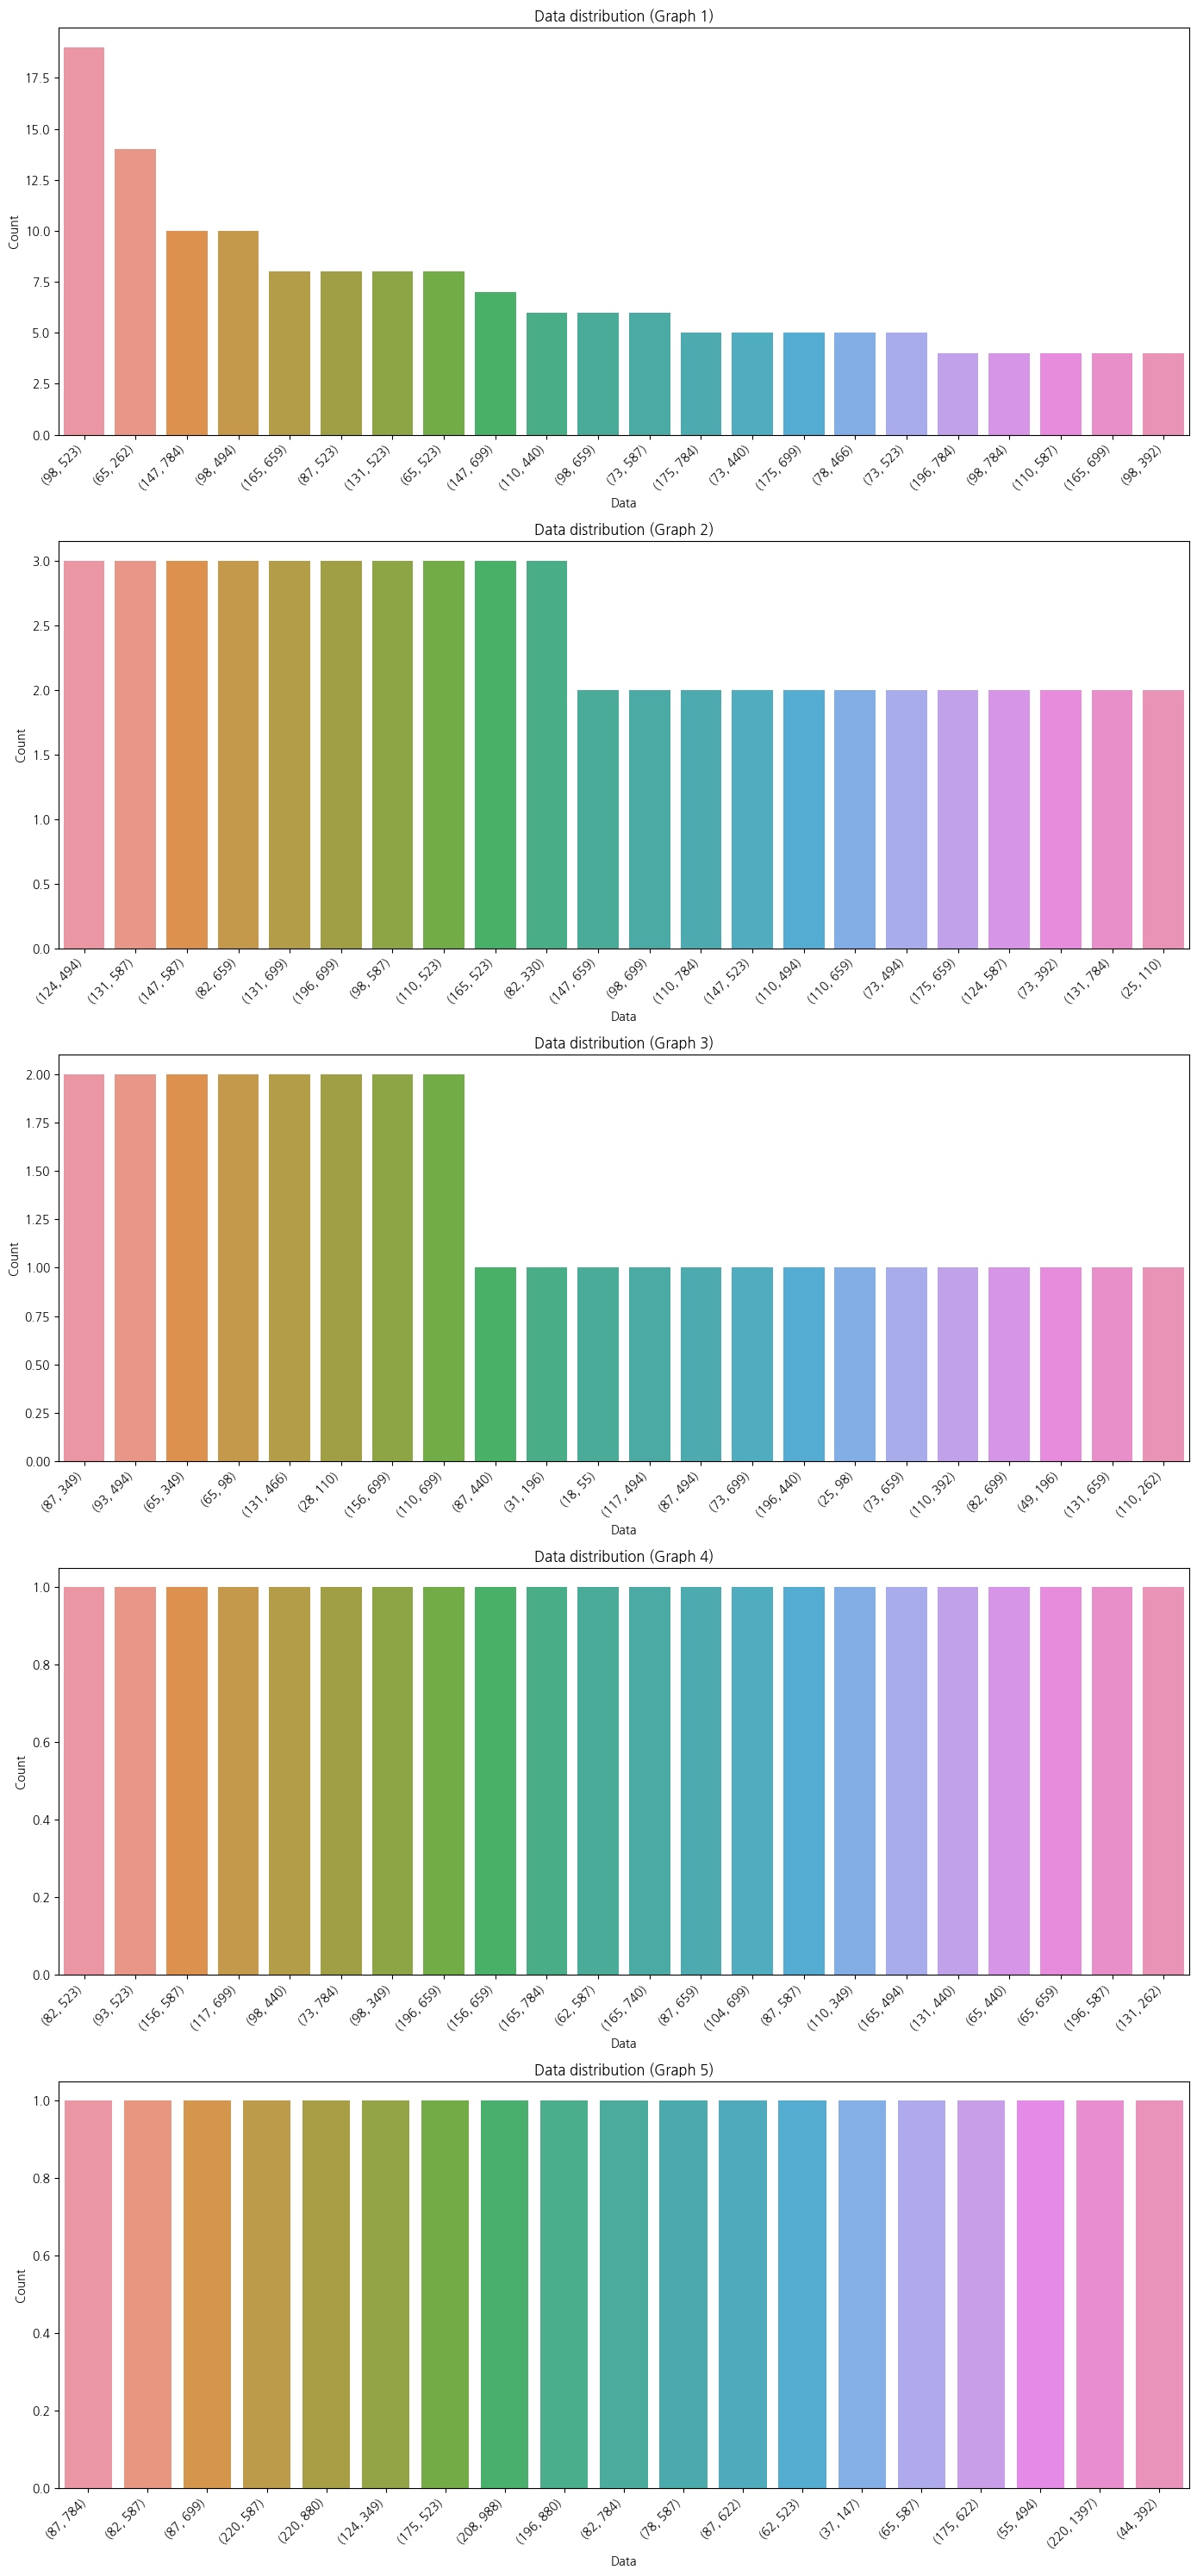

In [16]:
# 주파수 별 분포 확인
data_distribution(df_octave, 'Frequency', 22)

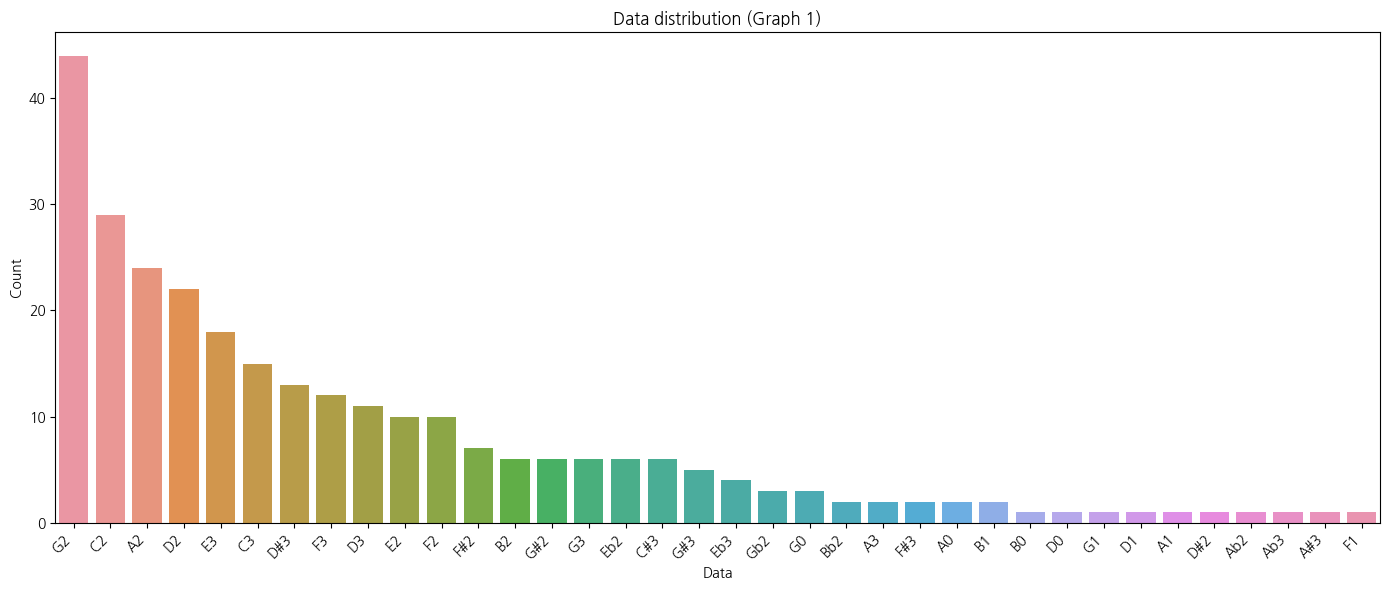

In [218]:
# 최저 음역대 분포 확인
data_distribution(df_octave, 'Low', 37)

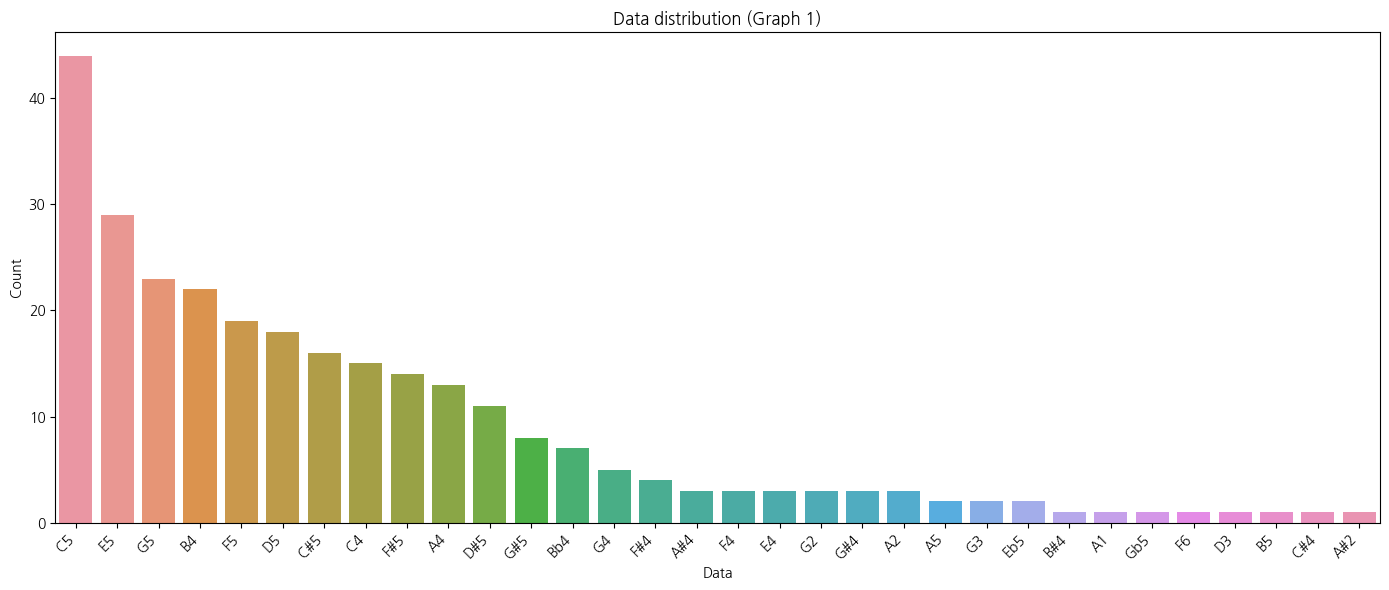

In [17]:
# 최고 음역대 분포 확인
data_distribution(df_octave, 'High', 33)

## Preprocessing

### Import package

In [8]:
import os
import subprocess
DATA_DIR = '/home/ckjwh/ckj/SongSSam/Remover/vocal-remover'

### Vocal Remover

In [12]:
def separate_audio(input_file, output_dir, gpu_id=0):
    # Build the command for separating audio
    command = [
        'python',
        '{DATA_DIR}/inference.py',
        '--input', input_file,
        '--tta',
        '--gpu', str(gpu_id),
        '--output_dir', output_dir
    ]

    # Run the command
    subprocess.run(command)

def separate_audio_in_folder(input_folder, output_dir, gpu_id=0):
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # List all audio files in the input folder
    audio_files = [f for f in os.listdir(input_folder) if f.endswith('.mp3')]  # Replace with the actual audio file extension

    for audio_file in audio_files:
        input_path = os.path.join(input_folder, audio_file)
        output_path = os.path.join(output_dir, audio_file)

        # Call the separate_audio function for each file in the folder
        separate_audio(input_path, output_path, gpu_id)

In [9]:
# 파일 경로에 있는 mp3에서 보컬 및 MR 분리 
input_folder = '/home/ckjwh/ckj/SongSSam/Dataset/Song/Source1'  # Data folder path
output_folder = '/home/ckjwh/ckj/SongSSam/Dataset/Song/Preprocess'  # Output folder path
gpu_id = 0  

# separate_audio_in_folder(input_folder, output_folder, gpu_id)

## Recommend System

In [5]:
# # 데이터프레임에서 장르를 분할하여 복제하는 함수
# def expand_genres(dataframe):
#     expanded_data = []
#     for index, row in dataframe.iterrows():
#         genres = row['Genre'].split()  # 띄어쓰기로 구분된 장르를 분할
#         for genre in genres:
#             expanded_row = row.copy()
#             expanded_row['Genre'] = genre
#             expanded_data.append(expanded_row)
#     expanded_df = pd.DataFrame(expanded_data)
#     return expanded_df

# # 장르를 분할하여 데이터 확장
# df_singer = expand_genres(df_singer)

In [8]:
# 고유한 장르 값 추출
unique_genres = df_singer['Genre'].str.split().explode().unique()

In [9]:
# 장르를 고유한 ID로 매핑
genre_to_id = {genre: idx for idx, genre in enumerate(unique_genres)}

In [10]:
genre_to_id

{'랩/힙합': 0,
 '발라드': 1,
 '댄스': 2,
 '국내드라마': 3,
 '인디음악': 4,
 '록/메탈': 5,
 '일렉트로니카': 6,
 '포크/블루스': 7,
 'R&B/Soul': 8,
 '성인가요/트로트': 9,
 '국내영화': 10,
 '애니메이션/웹툰': 11,
 '키즈': 12,
 '만화': 13,
 'J-POP': 14,
 '재즈': 15,
 '애시드/퓨전/팝': 16,
 'POP': 17,
 '국외영화': 18,
 '클래식': 19,
 '오페라/성악': 20,
 '크로스오버': 21,
 '게임': 22,
 '창작동요': 23,
 '국내뮤지컬': 24,
 '-': 25,
 'CCM': 26,
 '국내CCM': 27,
 '국악': 28,
 '국악가요': 29,
 '뉴에이지': 30,
 '월드뮤직': 31,
 '중국음악': 32,
 '국외드라마': 33,
 '보사노바': 34,
 '포크': 35,
 '자장가': 36,
 '워십': 37}

In [11]:
# JSON 파일로 저장
import json

with open('genre.json', 'w') as json_file:
    json.dump(genre_to_id, json_file)

In [69]:
df_singer['Genre_ID'] = df_singer['Genre'].str.split().apply(lambda x: ' '.join(str(genre_to_id[genre]) for genre in x))

In [70]:
df_singer

Title        Artist  Rating      Genre  \
5518                                     봄날         방탄소년단  550574       랩/힙합   
1634                                    밤편지           아이유  462165        발라드   
5516                               Dynamite         방탄소년단  458072         댄스   
4918  모든 날  모든 순간 (Every day  Every Moment)            폴킴  427725  발라드 국내드라마   
5560                           주저하는 연인들을 위해           잔나비  394868  인디음악 록/메탈   
...                                     ...           ...     ...        ...   
8785              여름밤의 추억(One Summer Night)           이채연       0   성인가요/트로트   
7443        Just In Love (Joe Jonas Remake)  Supreme Team       0        POP   
8803                                   간다더니           이채연       0   성인가요/트로트   
7444          It Girl (Jason Derulo Remake)  Supreme Team       0        POP   
8811                                내마음은빗소리           이채연       0   성인가요/트로트   

     Genre_ID  Artist_ID  Title_ID  Log_Rating  Rating_Distribution  
5518        0        135      4607   13.218718             1.000000  
1634        1        175      4490   13.043679             0.986758  
5516        2        135       620   13.034784             0.986085  
4918      1 3        266      4224   12.966238             0.980900  
5560      4 5        219      6613   12.886309             0.974853  
...       ...        ...       ...         ...                  ...  
8785        9        212      5781    0.000000             0.000000  
7443       17         55      1085    0.000000             0.000000  
8803        9        212      2433    0.000000             0.000000  
7444       17         55      1061    0.000000             0.000000  
8811        9        212      3403    0.000000             0.000000  

[8212 rows x 9 columns]

In [65]:
df_singer["Genre"]

5518         랩/힙합
1634          발라드
5516           댄스
4918    발라드 국내드라마
5560    인디음악 록/메탈
          ...    
8785     성인가요/트로트
7443          POP
8803     성인가요/트로트
7444          POP
8811     성인가요/트로트
Name: Genre, Length: 8212, dtype: object

In [71]:
df_singer['Artist'] = df_singer['Artist'].astype('category')
df_octave['Artist'] = df_octave['Artist'].astype('category')

df_singer['Title'] = df_singer['Title'].astype('category')
# 장르를 범주형 데이터의 코드로 변환
df_singer['Artist_ID'] = df_singer['Artist'].cat.codes
df_octave['Artist_ID'] = df_octave['Artist'].cat.codes
df_singer['Title_ID'] = df_singer['Title'].cat.codes

In [15]:
import os

# 현재 디렉토리 내의 파일 목록 가져오기 (상대 경로 사용)
for root, dirs, files in os.walk("."):
    for index, file_name in enumerate(files):
        if "wav" in file_name:
            new_name = "Vocals.wav"
            # 파일 경로를 포함하여 이름 변경
            os.rename(os.path.join(root, file_name), os.path.join(root, new_name))


In [16]:
df_singer['Log_Rating'] = np.log1p(df_singer['Rating'])

max_rating = np.max(df_singer['Log_Rating'])
min_rating = np.min(df_singer['Log_Rating'])

df_singer['Rating_Distribution'] = (df_singer['Log_Rating'] - min_rating) / (max_rating - min_rating)

In [73]:
Encoding_Singer = df_singer[['Title_ID', 'Artist_ID', 'Genre_ID', 'Rating_Distribution']]
Encoding_Singer

Title_ID  Artist_ID Genre_ID  Rating_Distribution
5518      4607        135        0             1.000000
1634      4490        175        1             0.986758
5516       620        135        2             0.986085
4918      4224        266      1 3             0.980900
5560      6613        219      4 5             0.974853
...        ...        ...      ...                  ...
8785      5781        212        9             0.000000
7443      1085         55       17             0.000000
8803      2433        212        9             0.000000
7444      1061         55       17             0.000000
8811      3403        212        9             0.000000

[8212 rows x 4 columns]

In [77]:
# 데이터프레임 df가 있다고 가정하고, 'Genre' 칼럼에 대해 '/' 또는 ' '를 기준으로 분리
new_df = Encoding_Singer['Genre_ID'].str.replace('/', ' ').str.split()



In [ ]:
# 결과를 원-핫 인코딩
df_encoded = new_df.apply(lambda x: pd.Series([1]*len(x), index=x)).fillna(0, downcast='infer')

# 원래의 데이터프레임과 결합
new_df = pd.concat([df_singer, df_encoded], axis=1)

In [78]:
new_df

5518       [0]
1634       [1]
5516       [2]
4918    [1, 3]
5560    [4, 5]
         ...  
8785       [9]
7443      [17]
8803       [9]
7444      [17]
8811       [9]
Name: Genre_ID, Length: 8212, dtype: object

In [79]:
df_encoded = new_df.apply(lambda x: pd.Series([1]*len(x), index=x)).fillna(0, downcast='infer')

In [83]:
df_encoded.columns = ['Genre_' + str(i) for i in df_encoded.columns]

In [84]:
# 원래의 데이터프레임과 결합
new_df = pd.concat([Encoding_Singer, df_encoded], axis=1)

In [85]:
new_df

Title_ID  Artist_ID Genre_ID  Rating_Distribution  Genre_0  Genre_1  \
5518      4607        135        0             1.000000        1        0   
1634      4490        175        1             0.986758        0        1   
5516       620        135        2             0.986085        0        0   
4918      4224        266      1 3             0.980900        0        1   
5560      6613        219      4 5             0.974853        0        0   
...        ...        ...      ...                  ...      ...      ...   
8785      5781        212        9             0.000000        0        0   
7443      1085         55       17             0.000000        0        0   
8803      2433        212        9             0.000000        0        0   
7444      1061         55       17             0.000000        0        0   
8811      3403        212        9             0.000000        0        0   

      Genre_2  Genre_3  Genre_4  Genre_5  ...  Genre_28  Genre_29  Genre_30  \
5518        0        0        0        0  ...         0         0         0   
1634        0        0        0        0  ...         0         0         0   
5516        1        0        0        0  ...         0         0         0   
4918        0        1        0        0  ...         0         0         0   
5560        0        0        1        1  ...         0         0         0   
...       ...      ...      ...      ...  ...       ...       ...       ...   
8785        0        0        0        0  ...         0         0         0   
7443        0        0        0        0  ...         0         0         0   
8803        0        0        0        0  ...         0         0         0   
7444        0        0        0        0  ...         0         0         0   
8811        0        0        0        0  ...         0         0         0   

      Genre_31  Genre_32  Genre_33  Genre_34  Genre_35  Genre_36  Genre_37  
5518         0         0         0         0         0         0         0  
1634         0         0         0         0         0         0         0  
5516         0         0         0         0         0         0         0  
4918         0         0         0         0         0         0         0  
5560         0         0         0         0         0         0         0  
...        ...       ...       ...       ...       ...       ...       ...  
8785         0         0         0         0         0         0         0  
7443         0         0         0         0         0         0         0  
8803         0         0         0         0         0         0         0  
7444         0         0         0         0         0         0         0  
8811         0         0         0         0         0         0         0  

[8212 rows x 42 columns]

In [18]:
Encoding_Singer

Title_ID  Artist_ID Genre_ID  Rating_Distribution
5518      4607        135        0             1.000000
1634      4490        175        1             0.986758
5516       620        135        2             0.986085
4918      4224        266      1 3             0.980900
5560      6613        219      4 5             0.974853
...        ...        ...      ...                  ...
8785      5781        212        9             0.000000
7443      1085         55       17             0.000000
8803      2433        212        9             0.000000
7444      1061         55       17             0.000000
8811      3403        212        9             0.000000

[8212 rows x 4 columns]

In [19]:
df_octave[['Low_Frequency', 'High_Frequency']] = pd.DataFrame(df_octave.apply(lambda row: convert_to_frequency(row, octave_table), axis=1).to_list(), columns=['Low_Frequency', 'High_Frequency'])
Encoding_Octave = df_octave[['Artist_ID', 'Low_Frequency', 'High_Frequency']]

In [64]:
recommend['Genre_ID'].value_counts()

1       1599
8        847
9        846
5        811
0        810
        ... 
1 0        1
1 2        1
33         1
5 18       1
0 5        1
Name: Genre_ID, Length: 81, dtype: int64

In [20]:
# 두 데이터프레임을 'Artist' 열을 기준으로 concat
recommend = pd.merge(Encoding_Singer, Encoding_Octave, on='Artist_ID', how='outer')
recommend

Title_ID  Artist_ID Genre_ID  Rating_Distribution  Low_Frequency  \
0         4607        135        0             1.000000            131   
1          620        135        2             0.986085            131   
2          526        135        0             0.970944            131   
3          660        135        0             0.963163            131   
4         1006        135        0             0.959037            131   
...        ...        ...      ...                  ...            ...   
8207      6324        253        9             0.310989             65   
8208      3268        253       24             0.226628             65   
8209      5587        253        9             0.121754             65   
8210      6337        203      1 4             0.471487            104   
8211      5154        203        1             0.403786            104   

      High_Frequency  
0                699  
1                699  
2                699  
3                699  
4                699  
...              ...  
8207             523  
8208             523  
8209             523  
8210             699  
8211             699  

[8212 rows x 6 columns]

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
 user_genre = '랩/힙합'
 user_low = 203.961
 user_high = 590.664

In [23]:
def recommend_songs(user_genre, user_low, user_high, dataframe):
    # 사용자 입력 데이터와 데이터프레임의 데이터를 결합
    user_data = {'Genre_ID': [dataframe['Genre_ID'].cat.categories.get_loc(user_genre)],
                 'Low': [(user_low)],
                 'High': [user_high]}

    user_df = pd.DataFrame(user_data)

    # 데이터프레임에 사용자 데이터 추가
    extended_df = pd.concat([dataframe, user_df], ignore_index=True)

    # 장르와 음역대에 대한 유사도 계산
    similarity_matrix = cosine_similarity(extended_df[['Genre_ID', 'Low_Frequency', 'High_Frequency']])

    # 사용자 데이터에 대한 유사도 정보 추출
    user_similarity = similarity_matrix[-1]

    # 유사도를 기반으로 추천
    recommended_songs = dataframe.iloc[user_similarity.argsort()[:-1]]  # 가장 유사한 것을 제외하고 추천

    return recommended_songs


In [ ]:
recommend_songs(user_genre, user_low, user_high, recommend)

In [25]:
from scipy.stats import norm

def visual(df, feature):
    # Rating 열의 데이터를 히스토그램으로 시각화
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=20, density=True, alpha=0.6, color='b', label='Rating Distribution')

    # 평균과 표준편차 계산
    mean_rating = np.mean(df[feature])
    std_deviation = np.std(df[feature])

    # 정규분포를 그리기 위한 x 범위 생성
    x = np.linspace(mean_rating - 3*std_deviation, mean_rating + 3*std_deviation, 100)
    # 정규분포 그리기
    plt.plot(x, norm.pdf(x, mean_rating, std_deviation), 'r', label='Normal Distribution')

    plt.title('Rating Data Distribution')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

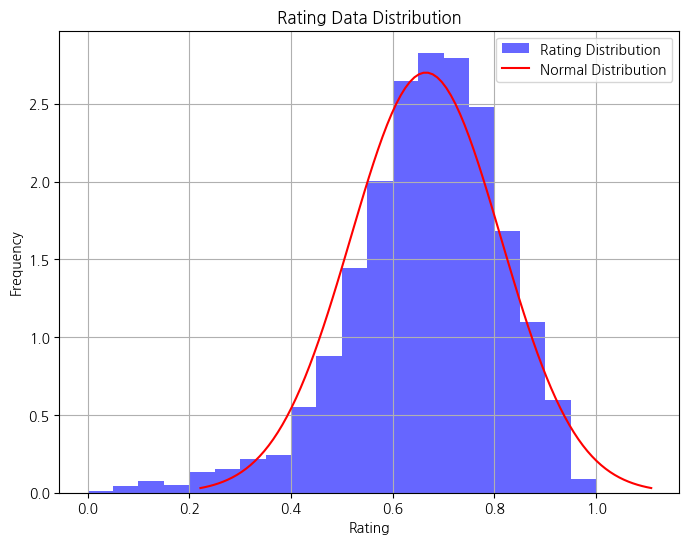

In [26]:
visual(recommend, "Rating_Distribution")

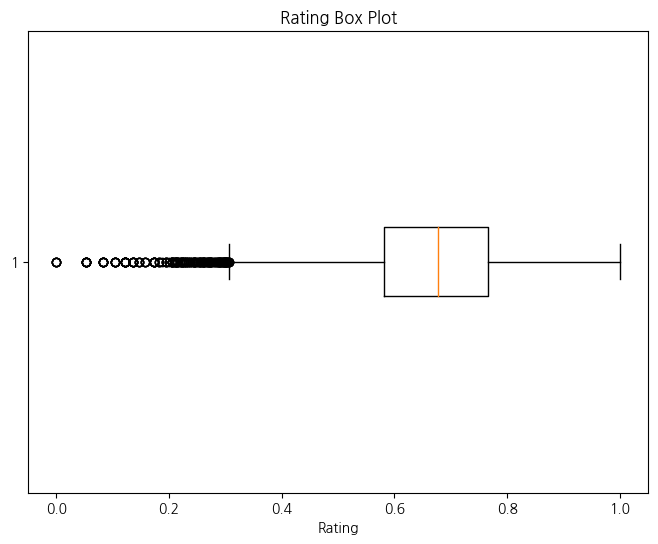

In [27]:
# Rating 열에 대한 박스 플롯 시각화
plt.figure(figsize=(8, 6))
plt.boxplot(recommend['Rating_Distribution'], vert=False)
plt.title('Rating Box Plot')
plt.xlabel('Rating')
plt.show()

In [24]:
import librosa
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 오디오 파일 로드
audio_file = "/home/ckjwh/ckj/SongSSam/Dataset/Song/Preprocess/1_그라데이션_10CM.mp3/1_그라데이션_10CM_Vocals.wav"
y, sr = librosa.load(audio_file)

# MFCC 계산
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

# 시간대 별 평균 MFCC 계산 (예: 1초 간격)
frame_duration = 0.1  # 초 단위
frames = librosa.times_like(mfccs)
frame_indices = np.arange(0, frames[-1], frame_duration)
mean_mfccs = []
for index in frame_indices:
    start = np.argmax(frames >= index)
    end = np.argmax(frames >= index + frame_duration)
    mean_mfcc = np.mean(mfccs[:, start:end], axis=1)
    mean_mfccs.append(mean_mfcc)




/home/ckjwh/anaconda3/envs/DDSP/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ckjwh/anaconda3/envs/DDSP/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [25]:
# 평균 MFCC 데이터를 DataFrame으로 변환
df = pd.DataFrame(mean_mfccs, columns=[f"MFCC_{i}" for i in range(1, 21)])

df = df.dropna()

# 표준화 (평균을 0, 표준편차를 1로 스케일링)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [26]:
df

MFCC_1  MFCC_2  MFCC_3  MFCC_4  MFCC_5  MFCC_6  MFCC_7  MFCC_8  \
0    -492.33551     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1    -492.33551     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2    -492.33551     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3    -492.33551     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4    -492.33551     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...         ...     ...     ...     ...     ...     ...     ...     ...   
2009 -492.33551     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2010 -492.33551     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011 -492.33551     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2012 -492.33551     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2013 -492.33551     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

      MFCC_9  MFCC_10  MFCC_11  MFCC_12  MFCC_13  MFCC_14  MFCC_15  MFCC_16  \
0        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
2009     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2010     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2011     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2012     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2013     0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

      MFCC_17  MFCC_18  MFCC_19  MFCC_20  
0         0.0      0.0      0.0      0.0  
1         0.0      0.0      0.0      0.0  
2         0.0      0.0      0.0      0.0  
3         0.0      0.0      0.0      0.0  
4         0.0      0.0      0.0      0.0  
...       ...      ...      ...      ...  
2009      0.0      0.0      0.0      0.0  
2010      0.0      0.0      0.0      0.0  
2011      0.0      0.0      0.0      0.0  
2012      0.0      0.0      0.0      0.0  
2013      0.0      0.0      0.0      0.0  

[2014 rows x 20 columns]

In [27]:
def extract_mfcc(filepath):
    # MFCC 계산
    y, sr = librosa.load(filepath, sr=None)  # sr=None으로 설정하여 원본 샘플링 속도로 읽음
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)  # MFCC 계산 (20개의 계수)
    feature = []

    # 각 MFCC 계수의 평균 계산
    mfcc_mean = np.mean(mfcc, axis=1)
    

    # 음역대 특성 추출
    # 각 음역대에 해당하는 MFCC 계수 범위를 선택하여 평균 계산
    very_low_range_feature = np.mean(mfcc_mean[:4])  # 매우 낮은 주파수 대역 (예: 처음 4개 계수의 평균)
    low_range_feature = np.mean(mfcc_mean[4:8])  # 낮은 주파수 대역 (예: 5~8번째 계수의 평균)
    mid_range_feature = np.mean(mfcc_mean[8:12])  # 중간 주파수 대역 (예: 9~12번째 계수의 평균)
    high_range_feature = np.mean(mfcc_mean[12:16])  # 높은 주파수 대역 (예: 13~16번째 계수의 평균)
    very_high_range_feature = np.mean(mfcc_mean[16:])  # 매우 높은 주파수 대역 (예: 17번째 이후 계수의 평균)
    
    feature.append([very_low_range_feature, low_range_feature, mid_range_feature, high_range_feature, very_high_range_feature])

    # 음역대 특성 출력
    print("매우 낮은 주파수 대역 특성:", very_low_range_feature)
    print("낮은 주파수 대역 특성:", low_range_feature)
    print("중간 주파수 대역 특성:", mid_range_feature)
    print("높은 주파수 대역 특성:", high_range_feature)
    print("매우 높은 주파수 대역 특성:", very_high_range_feature)
    
    
    return feature, mfcc_mean

## Result  

In [86]:
# 오디오 파일 로드
audio_file1 = "/home/ckjwh/ckj/Vocals.wav"

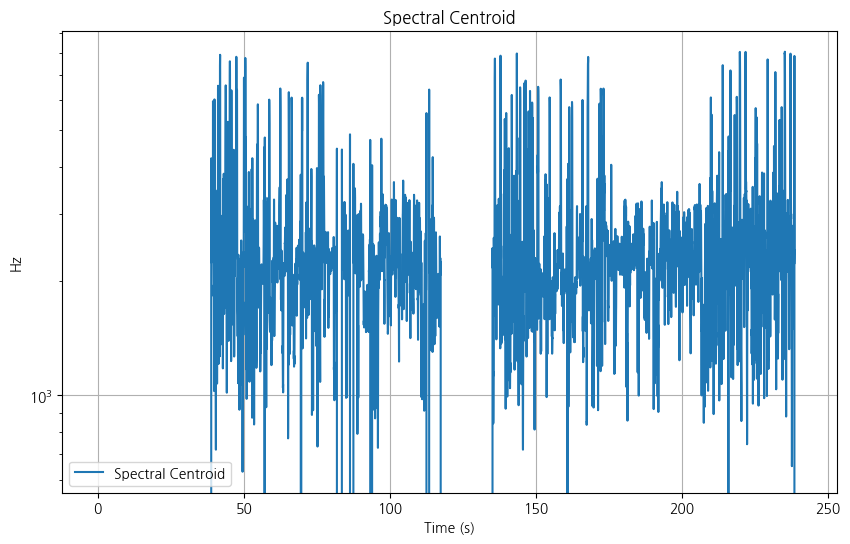

In [87]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 오디오를 로드하고 샘플 레이트를 가져옵니다.
audio, sr = librosa.load(audio_file1)

# 스펙트럼 센트로이드를 추출합니다.
spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sr)

# 시간 값 (x축) 생성
times = librosa.times_like(spectral_centroids)

# 스펙트럼 센트로이드 시각화
plt.figure(figsize=(10, 6))
plt.semilogy(times, spectral_centroids[0], label='Spectral Centroid')
plt.ylabel('Hz')
plt.xlabel('Time (s)')
plt.legend()
plt.title('Spectral Centroid')
plt.grid()
plt.show()


In [88]:
def vocal_pitch(filepath, confidence_value):
    
    data = pd.read_csv(filepath)
    
    
    filtered = data[data['confidence'] >= confidence_value]
    filtered.reset_index(inplace=True)
    
    time = filtered['time']
    frequency = filtered['frequency']

    # 필터링된 주파수에서 최저 주파수와 최대 주파수 추출
    if list(frequency.values):
        min_frequency = min(frequency)
        max_frequency = max(frequency)
        print("confidence >= 0.96인 주파수 중에서 최저 주파수:", min_frequency)
        print("confidence >= 0.96인 주파수 중에서 최대 주파수:", max_frequency)
    else:
        print("confidence >= 0.96인 주파수가 없습니다.")
    

    # 데이터의 총 시간 길이 계산
    total_time = time[len(time) - 1] - time[0]

    # 데이터를 20등분
    segment_length = total_time / 20
    num_segments = 20

    mean_frequency_segments = []
    for i in range(num_segments):
        start_time = time[0] + i * segment_length
        end_time = start_time + segment_length
        mask = (time >= start_time) & (time < end_time)
        segment_frequency = frequency[mask]
        mean_frequency = np.mean(segment_frequency)
        mean_frequency_segments.append(mean_frequency)

    time_segments = np.linspace(time[0], time[len(time) - 1], num_segments + 1)
    df = pd.DataFrame({'segment': time_segments[1:], 'frequency': mean_frequency_segments})
    
    return df, min_frequency, max_frequency, data

def visual_vocal_range(time_segments, mean_frequency_segments):
    # 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(time_segments, mean_frequency_segments, marker='o', linestyle='-', color='blue')
    plt.xlabel('Time (20 equal intervals)')
    plt.ylabel('Mean Frequency')
    plt.title('Mean Frequency vs. Time (20 equal intervals)')
    plt.grid(True)
    plt.show()
    
def visual_frequency(time, frequency, confidence):
    # 시각화
    plt.figure(figsize=(10, 6))
    plt.scatter(time, frequency, c=confidence, cmap='viridis', marker='o')
    plt.colorbar(label='Confidence')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('Frequency vs. Time with Confidence Colormap')
    plt.grid(True)
    plt.show()

In [38]:
audio_file1 = "/home/ckjwh/ckj/SongSSam/Dataset/Song/Preprocess1/Preprocess/0/Vocals.f0.csv"

In [31]:
data1 = pd.read_csv(audio_file1)

In [ ]:
data, mini, maxi = vocal_pitch(data1, 0.90)

In [35]:
visual_vocal_range(data['segment'], data['frequency'])

NameError: name 'data' is not defined

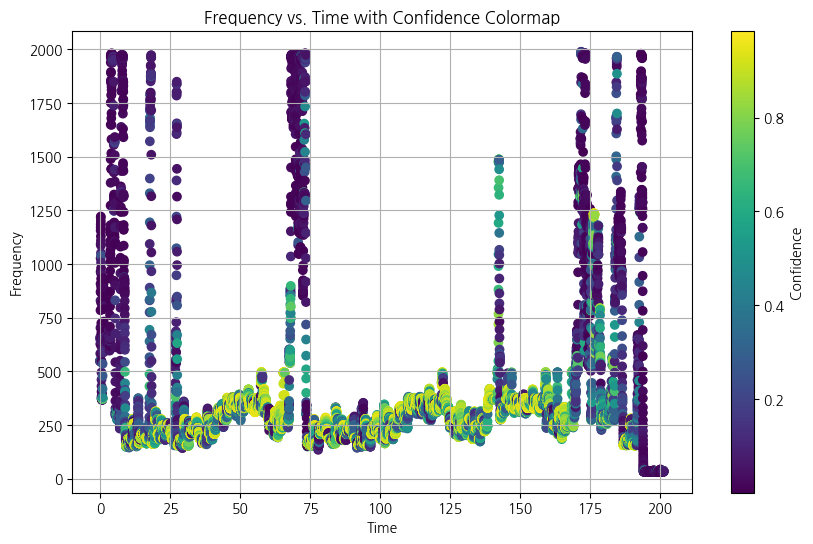

In [59]:
visual_frequency(time, frequency, confidence)

In [36]:
import librosa
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def extract_pitch_and_features(audio_path):
    # 음성을 로드합니다.
    audio, sr = librosa.load(audio_path)

    # 음성의 길이를 구합니다.
    length = len(audio) / sr

    # 15초 단위로 음성을 쪼갭니다.
    segment_duration = 15  # 15초 단위로 쪼갭니다.
    num_segments = int(np.ceil(length / segment_duration))

    # 각 시간에 대한 피치, 주파수 크기, 스펙트럴 센트로이드, 스펙트럴 대역비를 추출합니다.
    pitches = []
    frequency_magnitudes = []
    spectral_centroids = []
    spectral_contrasts = []

    for i in range(num_segments):
        start_time = i * segment_duration
        end_time = (i + 1) * segment_duration

        # 15초 세그먼트를 추출합니다.
        segment = audio[int(start_time * sr):int(end_time * sr)]

        # 피치 추출
        pitch, _ = librosa.piptrack(y=segment, sr=sr)
        pitch = pitch[pitch > 0]  # 유효한 피치 값만 남깁니다.

        # 사람의 음역대 범위 내로 제한
        min_human_pitch = librosa.note_to_hz('D0')  # 남성의 최저 음역대
        max_human_pitch = librosa.note_to_hz('F6')  # 여성의 최고 음역대
        pitch = np.clip(pitch, min_human_pitch, max_human_pitch)

        pitches.append(pitch)

        # 주파수 스펙트럼 추출
        spectrum = np.abs(librosa.stft(segment))

        # 주파수 크기 필터링 (사람의 음역대 내로 조절)
        min_human_pitch = librosa.note_to_hz('D0')  # 남성의 최저 음역대
        max_human_pitch = librosa.note_to_hz('F6')  # 여성의 최고 음역대
        filtered_spectrum = butter_bandpass_filter(spectrum, min_human_pitch, max_human_pitch, fs=sr)

        # 주파수 크기 추출 (음수 값을 0으로 설정)
        frequency_magnitude = np.maximum(filtered_spectrum, 0)
        frequency_magnitudes.append(frequency_magnitude)

        # 스펙트럴 센트로이드 추출
        spectral_centroid = librosa.feature.spectral_centroid(S=frequency_magnitude, sr=sr)
        spectral_centroids.append(spectral_centroid)

        # 스펙트럴 대역비 추출
        spectral_contrast = librosa.feature.spectral_contrast(S=frequency_magnitude, sr=sr)
        spectral_contrasts.append(spectral_contrast)

    # 각 시간에 대한 음역대를 계산합니다.
    pitch_ranges = []
    for pitch in pitches:
        if len(pitch) == 0:
            pitch_range = [0, 0]
        else:
            min_pitch = np.min(pitch)
            max_pitch = np.max(pitch)
            pitch_range = [min_pitch, max_pitch]
        pitch_ranges.append(pitch_range)

    # 결과를 데이터프레임으로 저장합니다.
    data = {
        '음역대': pitch_ranges,
        '피치': pitches,
        '주파수 크기': frequency_magnitudes,
        '스펙트럴 센트로이드': spectral_centroids,
        '스펙트럴 대역비': spectral_contrasts
    }
    df = pd.DataFrame(data)

    return df


In [46]:
audio_file2 = '/home/ckjwh/ckj/SongSSam/Dataset/Song/Preprocess/4/Vocals.wav'

In [47]:
# 음성의 음역대, 피치, 주파수 크기, 스펙트럴 센트로이드, 스펙트럴 대역비를 추출합니다.
vocal_feature = extract_pitch_and_features(audio_file2)

In [57]:
df1 = pd.DataFrame(vocal_feature["피치"][0])

0    146.270752
dtype: float32

Text(0.5, 1.0, 'Mel Spectrogram')

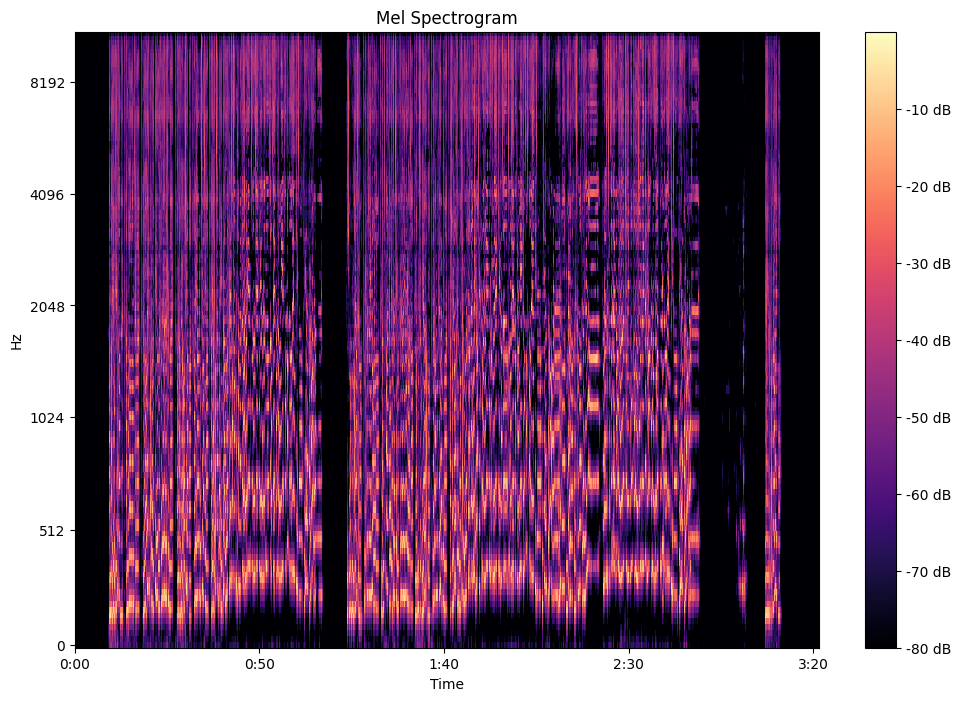

In [92]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np

# 오디오 파일을 로드합니다.
y, sr = librosa.load(audio_file1)

# Mel spectrogram 계산
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# Mel spectrogram을 데시벨로 변환
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Mel spectrogram 시각화
plt.figure(figsize=(12, 8))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')

In [61]:
import librosa
import numpy as np

# 주파수를 옥타브와 음계로 변환하는 함수
def hz_to_octave_pitch(frequency_hz):
    # A4 음의 주파수 (440 Hz)를 기준으로 반음 수 계산
    n = 12 * np.log2(frequency_hz / 440.0)
    
    # 반올림하여 가장 가까운 음계로 변환
    pitch_class = round(n) % 12
    
    # 옥타브 계산
    octave = 4 + (n // 12)
    
    # 음계 이름으로 변환
    pitch_names = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    pitch_name = pitch_names[pitch_class]
    
    return octave, pitch_name

def extract_pitch_range(audio_path):
    # 음성을 로드합니다.
    audio, sr = librosa.load(audio_path)

    # 최소 및 최대 유효 주파수를 설정합니다.
    min_valid_frequency = 20  # 최소 주파수
    max_valid_frequency = 20000  # 최대 주파수

    # 음성을 15초 단위로 쪼개서 저장합니다.
    samples = librosa.util.frame(audio, frame_length=int(sr * 15), hop_length=int(sr * 15))

    # 각 샘플에 대해 주파수를 계산하고 음역대로 변환합니다.
    pitch_classes = []
    for sample in samples.T:
        # FFT를 통해 주파수 스펙트럼을 계산합니다.
        spectrum = np.abs(np.fft.fft(sample))
        
        # 주파수 대역 중심을 계산합니다.
        frequency_bins = np.fft.fftfreq(len(spectrum))
        center_frequency = np.sum(frequency_bins * spectrum) / np.sum(spectrum)
        
        # 주파수가 유효 범위를 벗어나면 스킵합니다.
        if center_frequency < min_valid_frequency or center_frequency > max_valid_frequency:
            print(f"Skipping invalid frequency: {center_frequency}")
            continue
        
        try:
            # 주파수를 옥타브와 음계로 변환합니다.
            octave, pitch_class = hz_to_octave_pitch(center_frequency)
            pitch_classes.append((octave, pitch_class))
        except ValueError:
            # 주파수 변환 오류 시 예외 처리
            print(f"Skipping invalid frequency: {center_frequency}")

    return pitch_classes



In [62]:
recommend

Title_ID  Artist_ID Genre_ID  Rating_Distribution  Low_Frequency  \
0         4607        135        0             1.000000            131   
1          620        135        2             0.986085            131   
2          526        135        0             0.970944            131   
3          660        135        0             0.963163            131   
4         1006        135        0             0.959037            131   
...        ...        ...      ...                  ...            ...   
8207      6324        253        9             0.310989             65   
8208      3268        253       24             0.226628             65   
8209      5587        253        9             0.121754             65   
8210      6337        203      1 4             0.471487            104   
8211      5154        203        1             0.403786            104   

      High_Frequency  
0                699  
1                699  
2                699  
3                699  
4                699  
...              ...  
8207             523  
8208             523  
8209             523  
8210             699  
8211             699  

[8212 rows x 6 columns]

In [ ]:
import os
import pandas as pd


In [25]:
def read_preprocess(base_folder):
    # 데이터 프레임을 저장할 빈 리스트 생성
    Vocal_df = []

    # "Preprocess1" 폴더의 경로 설정

    # "Preprocess1" 폴더 내의 모든 하위 폴더를 반복
    for folder_name in os.listdir(base_folder):
        folder_path = os.path.join(base_folder, folder_name)
        
        # 각 폴더에서 "Vocals.f0.csv" 파일의 경로 설정
        csv_file_path = os.path.join(folder_path, "Vocals.f0.csv")
        
        # 파일이 존재하는 경우 데이터 프레임을 읽어와 리스트에 추가
        if os.path.exists(csv_file_path):
            df = pd.read_csv(csv_file_path)
            Vocal_df.append(df)
            
    return Vocal_df

In [30]:
vocal_features = []
for path_id in range(1, 8):
    folder_path = f"/home/ckjwh/ckj/SongSSam/Dataset/Song/Preprocess{path_id}/Preprocess"
    
    vocal_features.append(read_preprocess(folder_path))

In [115]:
vocal_feature = vocal_features[0][12]

In [122]:
data, mini, maxi = vocal_pitch(vocal_feature, 0.97)

confidence >= 0.96인 주파수 중에서 최저 주파수: 185.627
confidence >= 0.96인 주파수 중에서 최대 주파수: 350.395


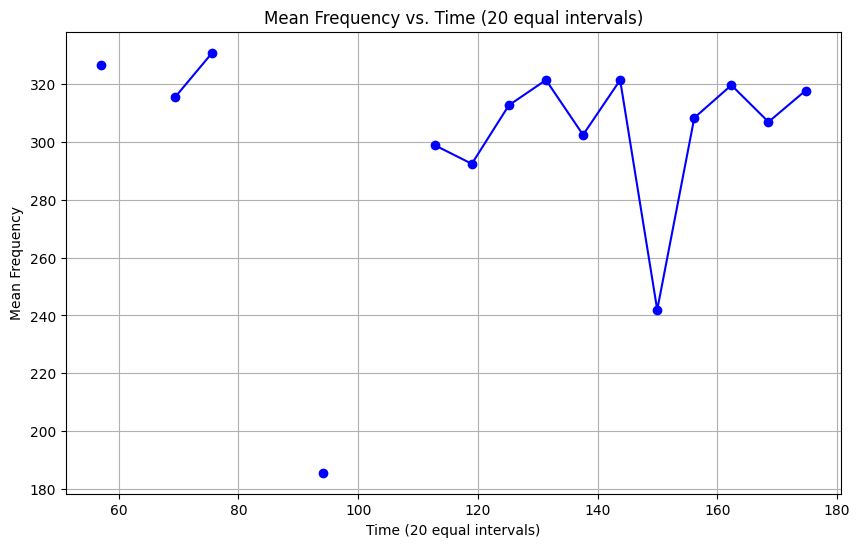

In [123]:
visual_vocal_range(data['segment'], data['frequency'])

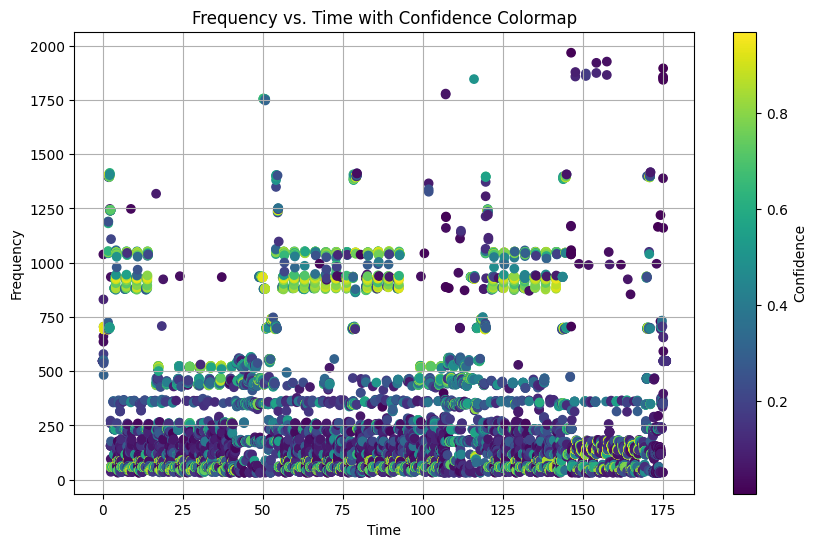

In [73]:
visual_frequency(vocal_feature.time, vocal_feature.frequency, vocal_feature.confidence)

## AI-Hub Vocal Preprocessing

In [2]:
gold_vocal_folderpath = '/home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation'

In [8]:
gold_source = gold_vocal_folderpath + '/source'
gold_label = gold_vocal_folderpath + '/label'

In [5]:
import os
import zipfile

def extract_zip_files(folder_path):
    # Iterate through all files and subfolders in the folder
    for folder_path, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".zip"):
                zip_file_path = os.path.join(folder_path, file)
                extraction_folder = os.path.splitext(zip_file_path)[0]  # Remove the .zip extension

                # Extract the zip file
                with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
                    zip_ref.extractall(extraction_folder)

                print(f"Extracted '{zip_file_path}' file.")

In [6]:
extract_zip_files(gold_source)

Extracted '/home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/트로트.zip' file.
Extracted '/home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/발라드R&B.zip' file.
Extracted '/home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝.zip' file.


In [9]:
extract_zip_files(gold_label)

Extracted '/home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/label/트로트.zip' file.
Extracted '/home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/label/발라드R&B.zip' file.
Extracted '/home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/label/록팝.zip' file.


In [13]:
import os
import subprocess
from tqdm import tqdm

# 전처리할 폴더 경로 설정
folder_path = "/home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1"

# 폴더 내의 모든 파일 목록 가져오기
for root, _, files in os.walk(folder_path):
    for file_name in files:
        if file_name.lower().endswith(".wav"):
            wav_file_path = os.path.join(root, file_name)

            # 확장자가 "wav"인 파일만 Crepe 실행 명령어 설정
            if os.path.isfile(wav_file_path):
                crepe_command = f"crepe {wav_file_path}"

                # Crepe 실행
                try:
                    subprocess.run(crepe_command, shell=True, check=True, stdout=subprocess.PIPE)
                    print(f"Processed: {wav_file_path}")
                except subprocess.CalledProcessError as e:
                    print(f"Error processing {wav_file_path}: {e}")



CREPE: Processing /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_02680_-3_a_s03_f_02.wav ... (1/1)
/home/ckjwh/anaconda3/envs/DDSP/lib/python3.8/site-packages/crepe/core.py:314: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, audio = wavfile.read(file)
2023-10-01 13:06:42.248628: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:06:42.248653: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-01 13:06:43.508656: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:06:43.508722: W tensorflow/stream_executor/

Processed: /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_02680_-3_a_s03_f_02.wav


CREPE: Processing /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_02402_-4_a_s03_f_02.wav ... (1/1)
/home/ckjwh/anaconda3/envs/DDSP/lib/python3.8/site-packages/crepe/core.py:314: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, audio = wavfile.read(file)
2023-10-01 13:08:25.524607: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:08:25.524630: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-01 13:08:26.774722: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:08:26.774787: W tensorflow/stream_executor/

Processed: /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_02402_-4_a_s03_f_02.wav


CREPE: Processing /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_01627_+5_a_s03_f_02.wav ... (1/1)
/home/ckjwh/anaconda3/envs/DDSP/lib/python3.8/site-packages/crepe/core.py:314: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, audio = wavfile.read(file)
2023-10-01 13:09:54.165795: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:09:54.165820: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-01 13:09:55.417693: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:09:55.417778: W tensorflow/stream_executor/

Processed: /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_01627_+5_a_s03_f_02.wav


CREPE: Processing /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_02765_+0_a_s03_f_02.wav ... (1/1)
/home/ckjwh/anaconda3/envs/DDSP/lib/python3.8/site-packages/crepe/core.py:314: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, audio = wavfile.read(file)
2023-10-01 13:11:45.613298: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:11:45.613323: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-01 13:11:46.870039: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:11:46.870106: W tensorflow/stream_executor/

Processed: /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_02765_+0_a_s03_f_02.wav


CREPE: Processing /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_03860_+0_a_s03_f_02.wav ... (1/1)
2023-10-01 13:13:00.139909: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:13:00.139936: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-01 13:13:01.389041: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:13:01.389116: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-

Processed: /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_03860_+0_a_s03_f_02.wav


CREPE: Processing /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_00155_-2_a_s03_f_02.wav ... (1/1)
2023-10-01 13:15:04.818525: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:15:04.818550: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-01 13:15:06.085532: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:15:06.085597: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-

Processed: /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_00155_-2_a_s03_f_02.wav


CREPE: Processing /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_02668_-2_a_s03_f_02.wav ... (1/1)
/home/ckjwh/anaconda3/envs/DDSP/lib/python3.8/site-packages/crepe/core.py:314: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, audio = wavfile.read(file)
2023-10-01 13:16:49.488177: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:16:49.488204: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-01 13:16:50.753669: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:16:50.753754: W tensorflow/stream_executor/

Processed: /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_02668_-2_a_s03_f_02.wav


CREPE: Processing /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_04112_+2_a_s03_f_02.wav ... (1/1)
/home/ckjwh/anaconda3/envs/DDSP/lib/python3.8/site-packages/crepe/core.py:314: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, audio = wavfile.read(file)
2023-10-01 13:18:40.263400: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:18:40.263425: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-01 13:18:41.513280: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:18:41.513364: W tensorflow/stream_executor/

Processed: /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_04112_+2_a_s03_f_02.wav


CREPE: Processing /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_03443_+5_a_s03_f_02.wav ... (1/1)
/home/ckjwh/anaconda3/envs/DDSP/lib/python3.8/site-packages/crepe/core.py:314: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, audio = wavfile.read(file)
2023-10-01 13:20:39.392116: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:20:39.392143: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-01 13:20:40.641040: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:20:40.641114: W tensorflow/stream_executor/

Processed: /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_03443_+5_a_s03_f_02.wav


CREPE: Processing /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_02716_+2_a_s03_f_02.wav ... (1/1)
/home/ckjwh/anaconda3/envs/DDSP/lib/python3.8/site-packages/crepe/core.py:314: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, audio = wavfile.read(file)
2023-10-01 13:22:55.352148: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:22:55.352173: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-01 13:22:56.611504: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:22:56.611575: W tensorflow/stream_executor/

Processed: /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_02716_+2_a_s03_f_02.wav


CREPE: Processing /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_03036_+0_a_s03_f_02.wav ... (1/1)
2023-10-01 13:25:15.683722: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:25:15.683747: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-01 13:25:16.937367: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:25:16.937461: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-

Processed: /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_03036_+0_a_s03_f_02.wav


CREPE: Processing /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_04060_-4_a_s03_f_02.wav ... (1/1)
/home/ckjwh/anaconda3/envs/DDSP/lib/python3.8/site-packages/crepe/core.py:314: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, audio = wavfile.read(file)
2023-10-01 13:26:48.469758: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:26:48.469783: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-01 13:26:49.733757: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-01 13:26:49.733822: W tensorflow/stream_executor/

Processed: /home/ckjwh/ckj/SongSSam/Dataset/Vocal_Data/data/Validation/source/록팝/Sample1/Female/20/Singer1/ro_04060_-4_a_s03_f_02.wav


In [90]:
audio_file = '/home/ckjwh/ckj/female_Vocal.wav'
f0_file = '/home/ckjwh/ckj/ro_02680_-3_a_s03_f_02.f0.csv'

### sample1

In [135]:
from sklearn.cluster import KMeans
import numpy as np

In [136]:
def extract_f0_centroid(filepath):
    data = pd.read_csv(filepath)
    frequency = data[data['confidence'] >= 0.9]['frequency']
    X = np.array(frequency.values).reshape(-1, 1)
    
    # K-means 클러스터링 알고리즘 적용
    kmeans = KMeans(n_clusters=8, random_state=0).fit(X)

    # 각 클러스터의 센트로이드 값 확인
    centroids = kmeans.cluster_centers_
    
    return centroids

In [ ]:
def visualize_f0_centroid(filepath, kemans, centroid):
    data = pd.read_csv(filepath)
    frequency = data[data['confidence'] >= 0.9]['frequency']
    
    # 데이터 포인트 그리기
    plt.scatter(frequency.index, frequency.values, c=kmeans.labels_, cmap='viridis')

    # 센트로이드 그리기
    plt.scatter(range(len(centroid)), centroid, c='red')

    plt.xlabel('Index')
    plt.ylabel('Frequency')
    plt.title('K-means Clustering')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt



In [120]:
df = pd.read_csv(f0_file)

In [121]:
new_frequency = df[df['confidence'] >= 0.9]['frequency']

In [126]:
new_frequency.values

array([317.992, 317.249, 316.309, ..., 405.187, 402.801, 393.89 ])

In [127]:
X = np.array(new_frequency.values).reshape(-1, 1)

In [128]:
X

array([[317.992],
       [317.249],
       [316.309],
       ...,
       [405.187],
       [402.801],
       [393.89 ]])

In [129]:


# 데이터를 2차원 배열로 변환


# K-means 클러스터링 알고리즘 적용
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)

# 각 클러스터의 센트로이드 값 확인
centroids = kmeans.cluster_centers_
print(centroids)

/home/ckjwh/anaconda3/envs/DDSP/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[329.45414518]
 [392.94937461]
 [296.23216426]
 [436.9571484 ]
 [218.30430811]
 [482.67122695]
 [260.03314369]
 [368.77227241]]


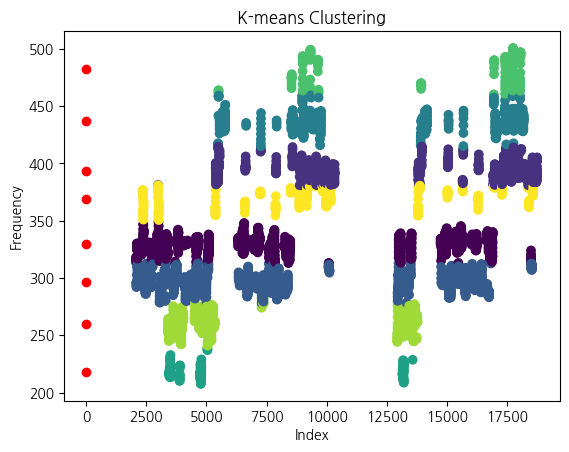

In [132]:
data1, min1, max1, df1 = vocal_pitch(f0_file, 0.9)

confidence >= 0.96인 주파수 중에서 최저 주파수: 207.528
confidence >= 0.96인 주파수 중에서 최대 주파수: 500.77


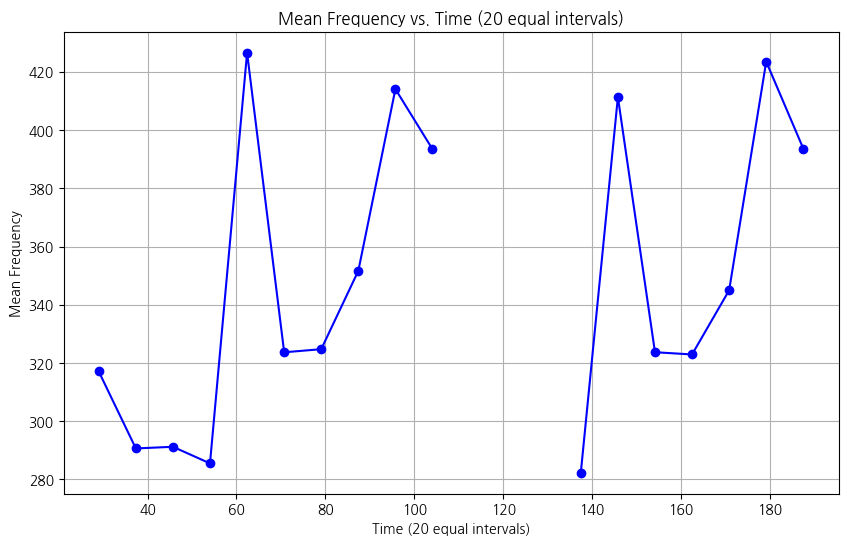

In [133]:
visual_vocal_range(data1['segment'], data1['frequency'])

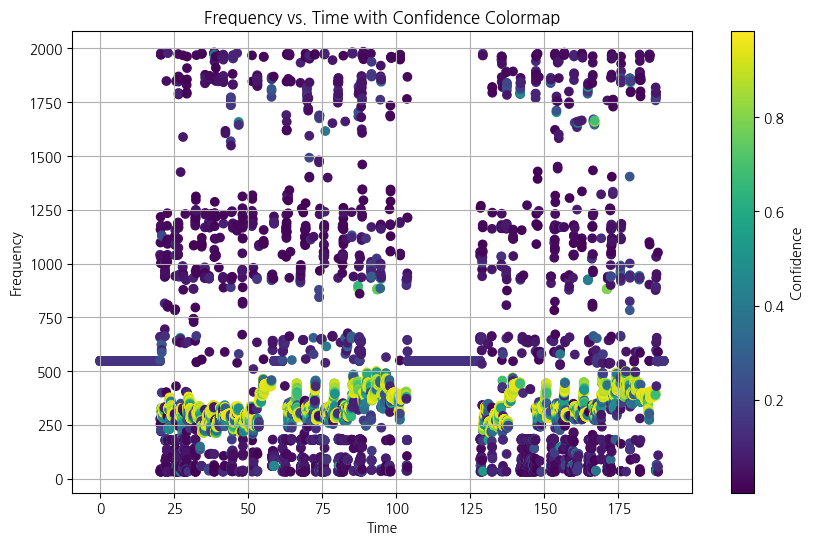

In [134]:
visual_frequency(df1.time, df1.frequency, df1.confidence)

### sample2

In [42]:
data2, min2, max2, df2 = vocal_pitch(audio_file2, 0.96)

confidence >= 0.96인 주파수 중에서 최저 주파수: 185.224
confidence >= 0.96인 주파수 중에서 최대 주파수: 443.5


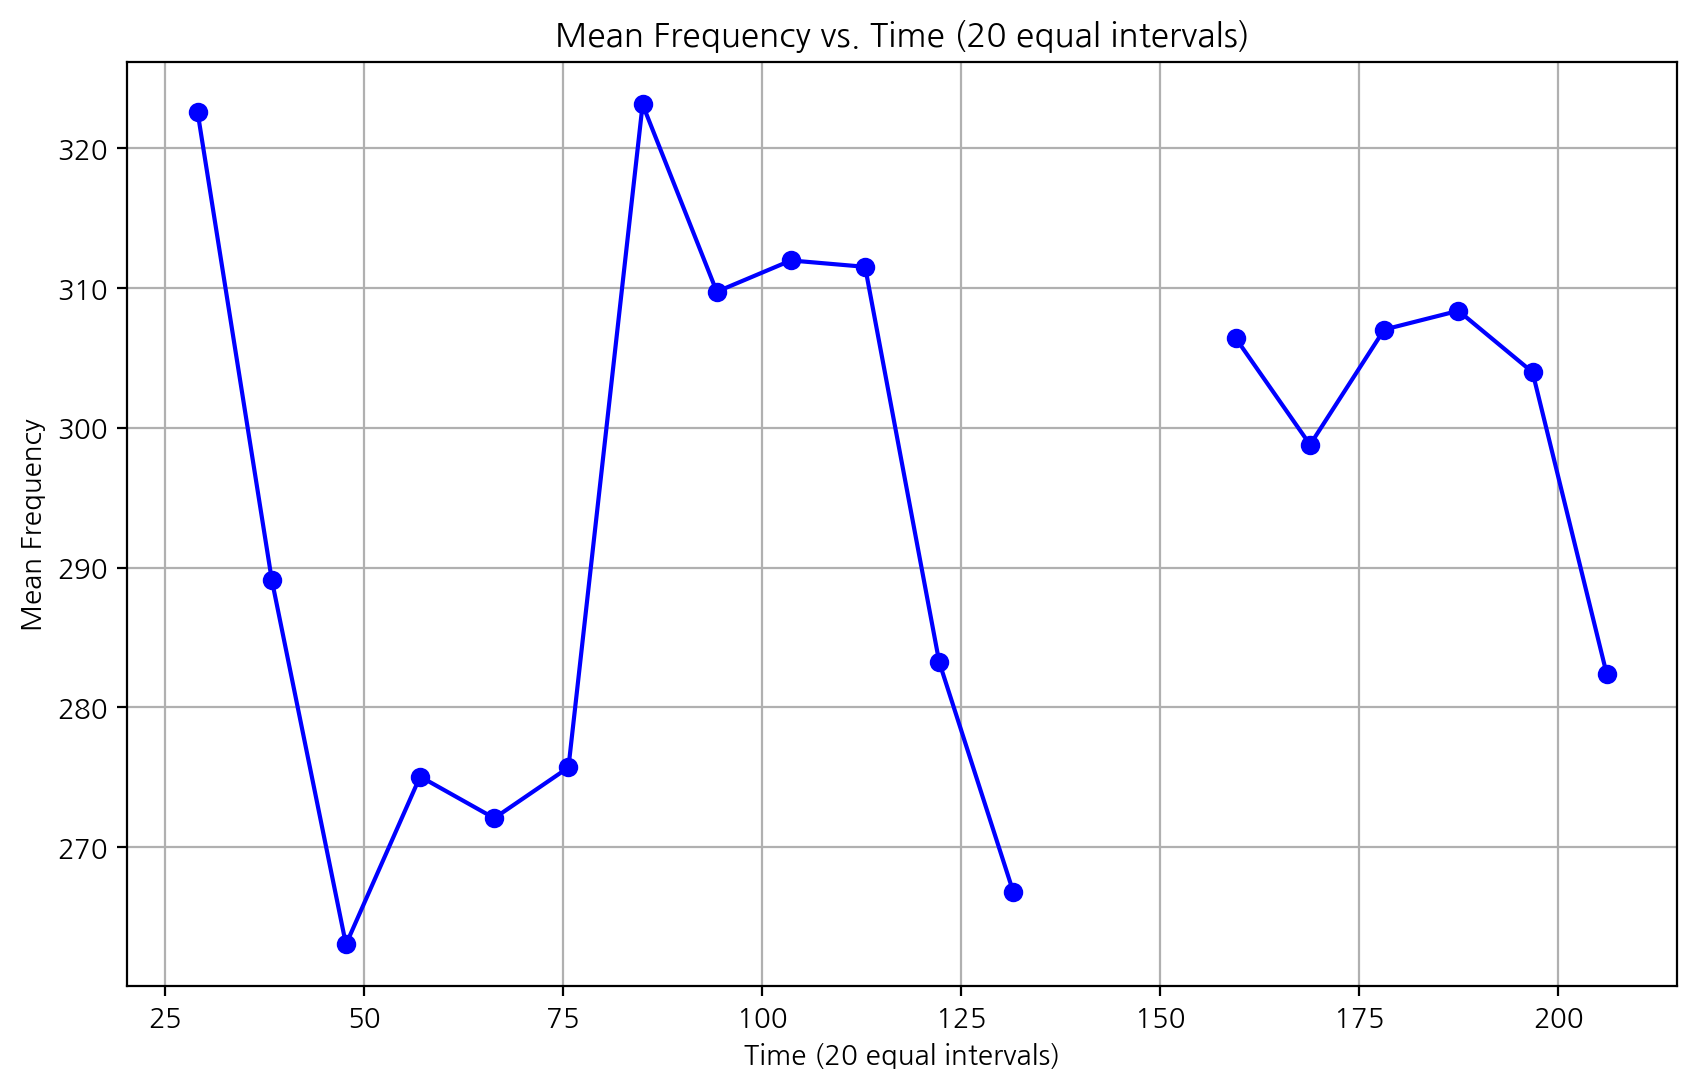

In [43]:
visual_vocal_range(data2['segment'], data2['frequency'])

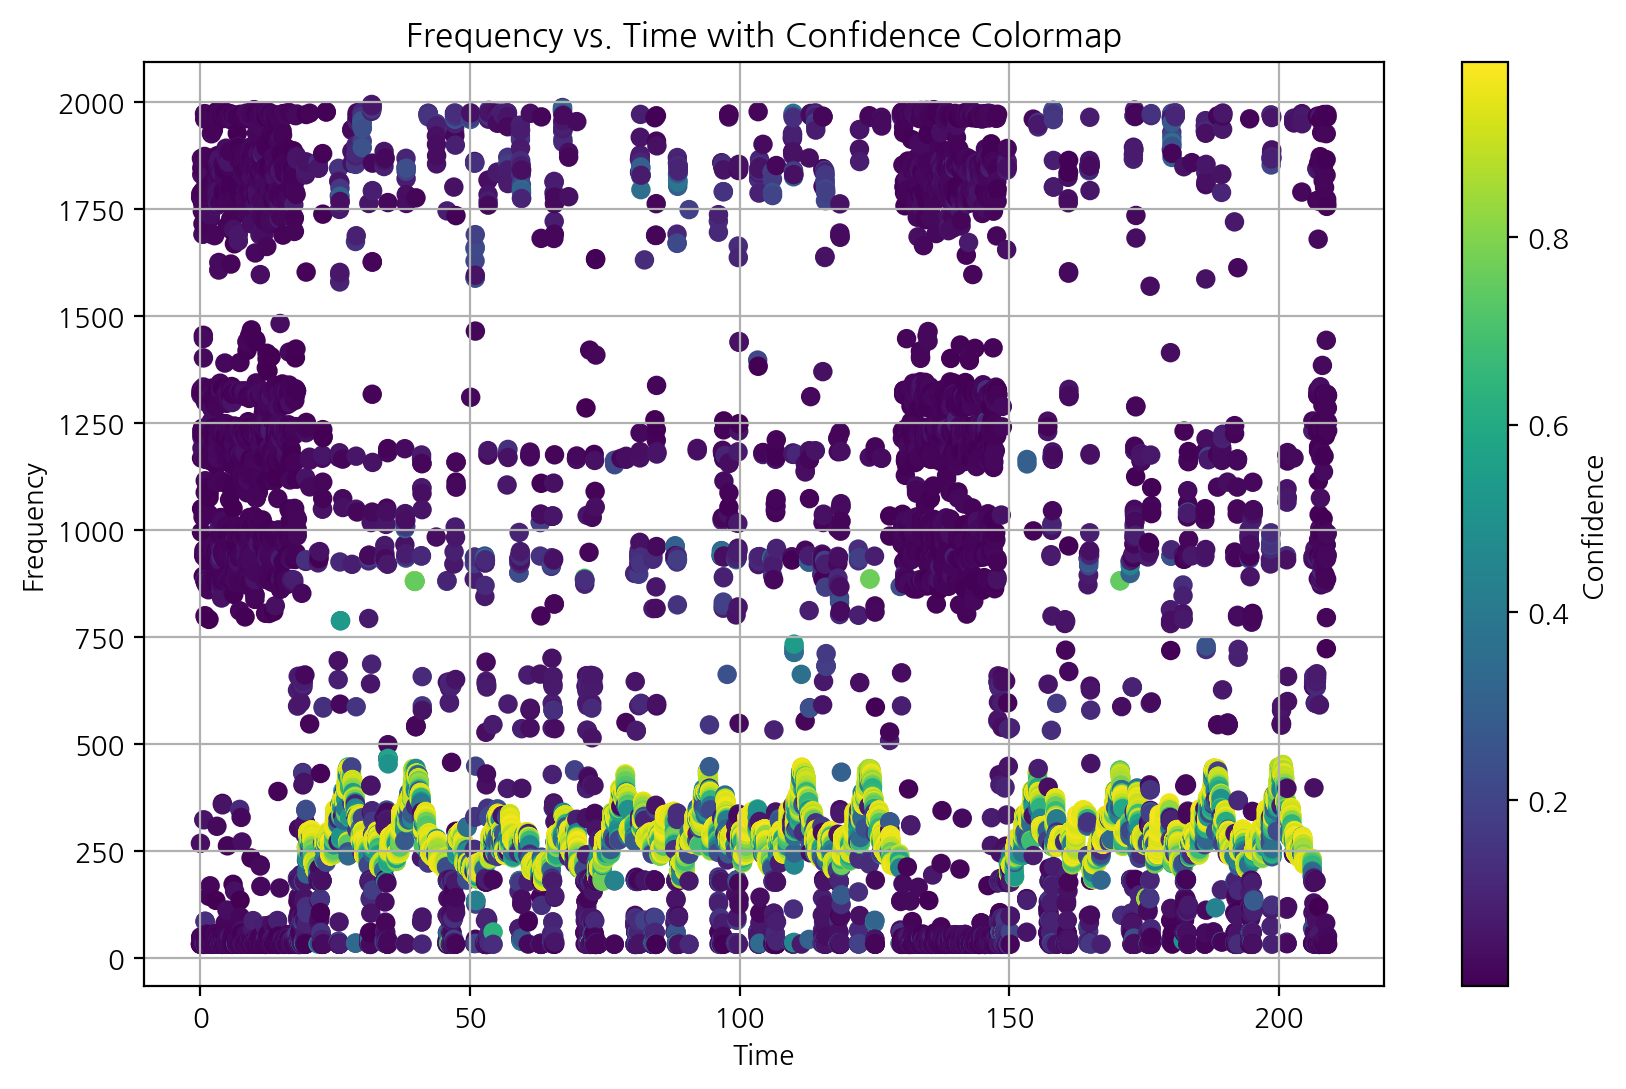

In [44]:
visual_frequency(df2.time, df2.frequency, df2.confidence)

### sample3

In [45]:
data3, min3, max3, df3 = vocal_pitch(audio_file3, 0.96)

confidence >= 0.96인 주파수 중에서 최저 주파수: 165.586
confidence >= 0.96인 주파수 중에서 최대 주파수: 468.797


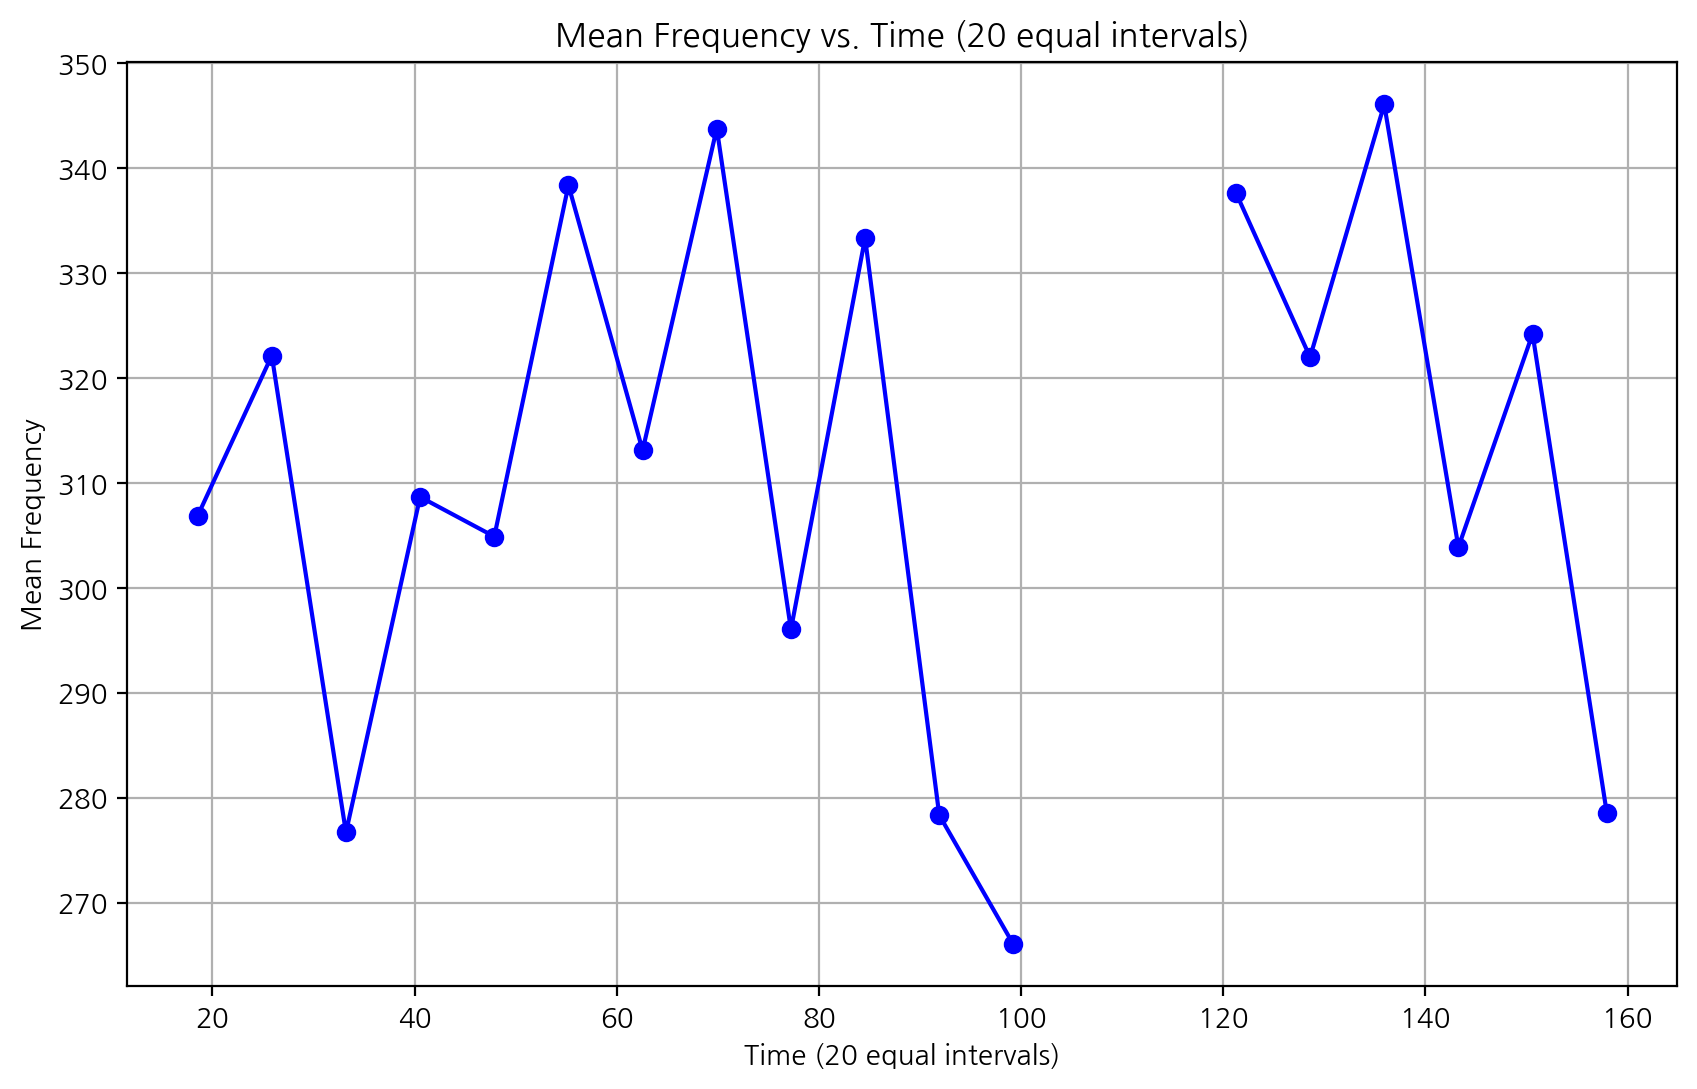

In [46]:
visual_vocal_range(data3['segment'], data3['frequency'])

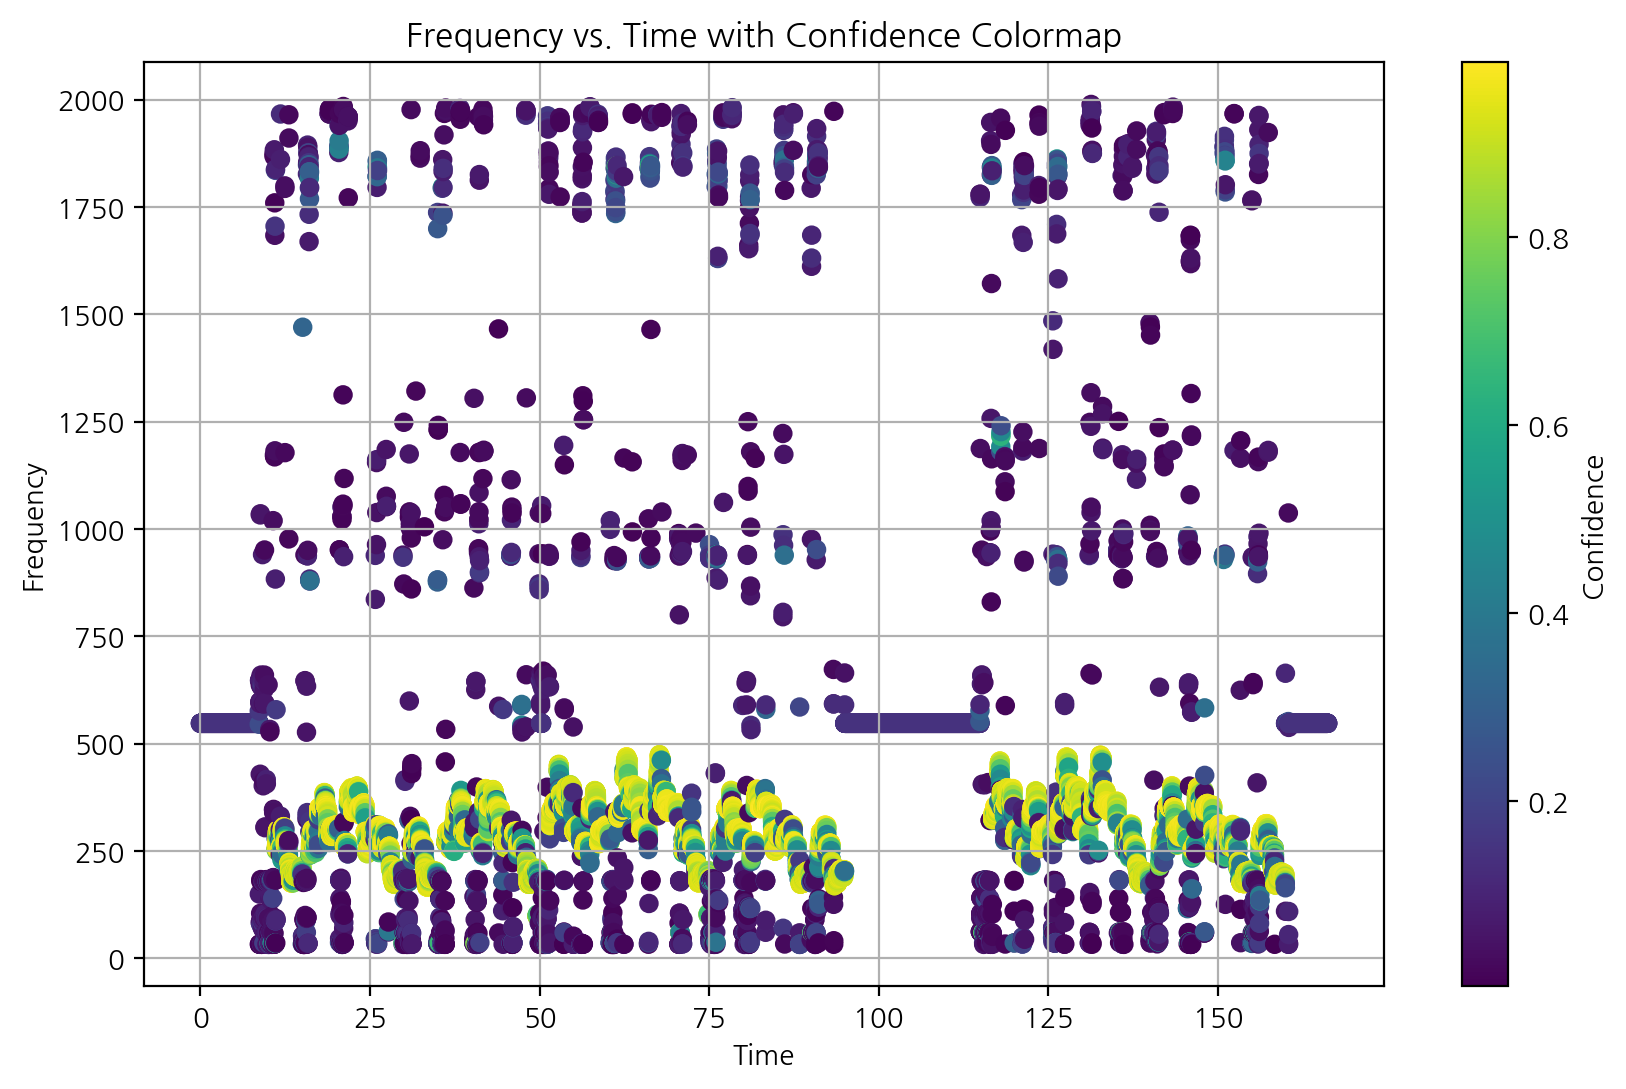

In [47]:
visual_frequency(df3.time, df3.frequency, df3.confidence)